# 1. Project Introduction

**Coronavirus** is a family of viruses that can cause illness, which can vary from _common cold_ and _cough_ to sometimes more servere disease. **Middle Eash Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br>
**SARS-CoV-2- (n-coronavirus)** is the new virus of the coronavirus family, which first _discovered_ in 2019, which has not been identified in humans before.

It is a *contigous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on the data 10 June 2020), this leads to a total or *500K + Deaths* across the globe.<br>

Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time.
        <br>
    <font face = "Verdana" size="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center>
    </font>
    <center><font face = "Verdana" size = "4"> Keep strong, world! Stay safe and healthy. </font></center>
    <br>

# Table of contents
* [2. Downloading and Installing Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
* [3. Downloading the Dataset](#3.-Downloading-the-Dataset)
* [4. Learn data](#3.-Learn-Data)

* [5. Global analysis](#5.-Global-analysis)
    * [Problem 1](#Problem-1)
    * [Problem 2](#Problem-2)
    * [Problem 3](#Problem-3)
    * [Problem 4](#Problem-4)
    * [Problem 6](#Problem-5)
    * [Problem 6](#Problem-6)
    * [Problem 7](#Problem-7)

* [Continent Analysis](Continent-Analysis)
    * [Problem 8](#Problem-8)
    * [Problem 9](#Problem-9)
    * [Problem 10](#Problem-10)
    * [Problem 11](#Problem-11)
    * [Problem 12](#Problem-12)
    * [Problem 13](#Problem-13)

* [6. Country Analysis](#6.-Country-Analysis)
    * [Problem 14](#Problem-14)
    * [Problem 15](#Problem-15)
    * [Problem 16](#Problem-16)
    * [Problem 17](#Problem-17)
    
* [7. Advanced Analysis](#7.-Advanced-Analysis)
    * [Problem 18](#Problem-18)
    * [Problem 19](#Problem-19)
    * [Problem 20](#Problem-20)
    * [Problem 21](#Problem-21)
    * [Problem 22](#Problem-22)

# 2. Downloading and Installing Prerequisite

**pycountry_convert:** Using country data derived from wikipedia, this package provides conversion functions between ISO country names, country-codes, and continent names.<br>

**folium, seaborn, plotly:** Some visualization packages in Python.<br>

Uncommnent and install some packages if you have not installed them. Otherwise, let continue.

In [1]:
# Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta, date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Downloading the Dataset
This dataset is update on daily basis by Johns Hopkins CSSE.

In [2]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
confirmed_df = confirmed_df.iloc[:, 0:564]
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,143871,144285,145008,145552,145996,146523,147154,147501,147985,148572
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,132875,132891,132922,132952,132999,133036,133081,133121,133146,133211
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,162155,163660,165204,167131,168668,170189,171392,172564,173922,175229
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,14498,14577,14586,14586,14655,14678,14678,14678,14747,14766
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,41780,41879,42110,42288,42486,42646,42777,42815,42970,43070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,316088,316088,316189,316328,316487,316603,316738,316861,317083,317264
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,7012,7012,7022,7027,7042,7058,7061,7070,7081,7086
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,192071,192316,192956,193432,194140,195096,195816,196293,196490,197123


In [4]:
deaths_df = deaths_df.iloc[:, 0:564]
deaths_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,6425,6477,6515,6577,6615,6677,6708,6737,6774,6804
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2456,2456,2456,2457,2457,2457,2457,2457,2457,2457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,4063,4087,4112,4161,4189,4219,4254,4291,4329,4370
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,128,128,128,128,128
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,984,991,994,1000,1003,1008,1011,1016,1018,1022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,3599,3599,3600,3601,3601,3601,3603,3604,3609,3609
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1373,1373,1374,1374,1374,1375,1375,1377,1378,1380
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,3272,3295,3316,3338,3355,3376,3389,3406,3412,3422


In [5]:
recoveries_df = recoveries_df.iloc[:, 0:564]
recoveries_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,130139,130152,130166,130174,130187,130205,130222,130243,130256,130291
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,110577,111322,112050,112900,113707,114531,115276,116009,116770,117557
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,13988,14077,14113,14113,14180,14210,14210,14210,14296,14348
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,35474,35686,35742,35964,36025,36708,37255,37397,38360,39389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,311526,311526,311560,311622,311714,311772,311832,311918,312149,312289
270,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,4166,4166,4168,4168,4171,4171,4185,4200,4212,4232
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,181638,182665,183534,183957,185210,186211,187236,188106,188950,189341


# 4. Learn data
    Determine the first date the dataset started to store the number of Covid cases of the 3 datasets

In [6]:
# Dữ liệu toàn cầu

confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [7]:
confirmed_df = confirmed_df.iloc[:, 0:5]
sorted(confirmed_df.columns)[0]

'1/22/20'

    Determine the last date the data was updated with the number of Covid cases of 3 DataFrames

In [8]:
confirmed_df.columns[-1]

'1/22/20'

    Determine how many countries are in this data

In [9]:
len(confirmed_df['Country/Region'].unique())

201

In [10]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [11]:
# confirmed_df.drop(['Province/State','Country/Region','Lat','Long'], axis=1)
len(confirmed_df.columns)-4

969

    See if there are any duplicate countries in the 3 datasets

In [12]:
duplicate_confirmed = confirmed_df[confirmed_df.duplicated('Country/Region')]
 
print("Duplicate_confirmed_df Rows :")
# Print the resultant Dataframe
duplicate_confirmed

Duplicate_confirmed_df Rows :


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/7/22,9/8/22,9/9/22,9/10/22,9/11/22,9/12/22,9/13/22,9/14/22,9/15/22,9/16/22
10,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,3461037,3463759,3463759,3463759,3463759,3463759,3463759,3463759,3481151,3481151
11,Northern Territory,Australia,-12.463400,130.845600,0,0,0,0,0,0,...,96399,96399,96447,96447,96447,96447,96447,96447,96447,96768
12,Queensland,Australia,-27.469800,153.025100,0,0,0,0,0,0,...,1618600,1620034,1620034,1620034,1622985,1622985,1622985,1622985,1622985,1622985
13,South Australia,Australia,-34.928500,138.600700,0,0,0,0,0,0,...,757540,758216,758840,758840,758840,758840,758840,758840,758840,762643
14,Tasmania,Australia,-42.882100,147.327200,0,0,0,0,0,0,...,246706,246706,246706,246706,246706,246706,246706,246706,246706,248012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,1229,1229,1229,1276,1276,1276,1276,1276,1326,1326
275,Pitcairn Islands,United Kingdom,-24.376800,-128.324200,0,0,0,0,0,0,...,4,4,4,4,4,4,4,-1,-1,-1
276,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
277,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,6372,6372,6372,6372,6372,6372,6372,6380,6380,6380


In [13]:
duplicate_deaths = deaths_df[deaths_df.duplicated('Country/Region')]
 
print("Duplicate_deaths_df Rows :")
# Print the resultant Dataframe
duplicate_deaths

Duplicate_deaths_df Rows :


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/7/22,9/8/22,9/9/22,9/10/22,9/11/22,9/12/22,9/13/22,9/14/22,9/15/22,9/16/22
10,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,0,0,...,5026,5046,5046,5046,5046,5046,5046,5046,5163,5163
11,Northern Territory,Australia,-12.463400,130.845600,0,0,0,0,0,0,...,70,70,70,70,70,70,70,70,70,70
12,Queensland,Australia,-27.469800,153.025100,0,0,0,0,0,0,...,2027,2048,2048,2048,2054,2054,2054,2054,2054,2125
13,South Australia,Australia,-34.928500,138.600700,0,0,0,0,0,0,...,796,798,860,860,860,860,860,860,860,907
14,Tasmania,Australia,-42.882100,147.327200,0,0,0,0,0,0,...,182,182,182,182,182,182,182,182,182,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
275,Pitcairn Islands,United Kingdom,-24.376800,-128.324200,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,-1,-1,-1
276,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,36,36,36,36,36,36,36,36,36,36


In [14]:
# Nhập code ở đây (recoveries_df):
duplicate_recoveries = recoveries_df[recoveries_df.duplicated('Country/Region')]
 
print("Duplicate_recoveries_df Rows :")
 
# Print the resultant Dataframe
duplicate_recoveries

Duplicate_recoveries_df Rows :


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/7/22,9/8/22,9/9/22,9/10/22,9/11/22,9/12/22,9/13/22,9/14/22,9/15/22,9/16/22
10,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Northern Territory,Australia,-12.463400,130.845600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,Queensland,Australia,-27.469800,153.025100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,South Australia,Australia,-34.928500,138.600700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,Tasmania,Australia,-42.882100,147.327200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,Pitcairn Islands,United Kingdom,-24.376800,-128.324200,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,-1,-1,-1
261,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


    Identify the countries in which the 3 data sets of Covid cases are stored nationally, not by city

In [15]:
print("Total of Country'Region", len(recoveries_df['Country/Region'].unique()))
recoveries_df['Country/Region'].unique()

Total of Country'Region 201


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

    Identify the countries included in the 3 datasets where the number of Covid cases are stored by city

In [16]:
print("Total of Province/State: ", len(recoveries_df['Province/State'].unique()))
recoveries_df['Province/State'].unique()

Total of Province/State:  76


array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Anhui', 'Beijing', 'Chongqing',
       'Fujian', 'Gansu', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan',
       'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan',
       'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning',
       'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai',
       'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Unknown', 'Xinjiang',
       'Yunnan', 'Zhejiang', 'Faroe Islands', 'Greenland',
       'French Guiana', 'French Polynesia', 'Guadeloupe', 'Martinique',
       'Mayotte', 'New Caledonia', 'Reunion', 'Saint Barthelemy',
       'Saint Pierre and Miquelon', 'St Martin', 'Wallis and Futuna',
       'Aruba', 'Bonaire, Sint Eustatius and Saba', 'Curacao',
       'Sint Maarten', 'Cook Islands', 'Niue', 'Anguilla', 'Bermuda',
       'British Virgin Islands', 'C

    Identify the country and date with the highest number of Covid cases

In [34]:
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,144285,145008,145552,145996,146523,147154,147501,147985,148572,148933
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,132891,132922,132952,132999,133036,133081,133121,133146,133211,133310
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,163660,165204,167131,168668,170189,171392,172564,173922,175229,176724
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,14577,14586,14586,14655,14678,14678,14678,14747,14766,14797
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,41879,42110,42288,42486,42646,42777,42815,42970,43070,43158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,316088,316189,316328,316487,316603,316738,316861,317083,317264,317404
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,7012,7022,7027,7042,7058,7061,7070,7081,7086,7096
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,192316,192956,193432,194140,195096,195816,196293,196490,197123,197791


In [17]:
len(confirmed_df.columns)

973

In [18]:
a=confirmed_df.iloc[:,4:].values.argmax()
a/(len(confirmed_df.columns)-4)

260.99896800825593

In [19]:
confirmed_df["Country/Region"].iloc[257]

'Tunisia'

In [20]:
confirmed_df.columns[257+4]

'10/5/20'

In [21]:
confirmed_df['10/5/20'].max()

7468281

    Identify the country with the highest total number of deaths due to Covid

In [22]:
b=deaths_df.iloc[:,4:].values.argmax()
b/(len(deaths_df.columns)-4)

260.99896800825593

In [23]:
deaths_df["Country/Region"].iloc[257]

'Tunisia'

In [24]:
deaths_df.columns[257+4]

'10/5/20'

In [25]:
deaths_df['10/5/20'].max()

209185

    Calculate the total number of Covid cases, the number of deaths, the number of recovered cases and the number of Covid cases at the present time in Vietnam

In [26]:
confirmed_df[confirmed_df['Country/Region']=="Vietnam"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/7/22,9/8/22,9/9/22,9/10/22,9/11/22,9/12/22,9/13/22,9/14/22,9/15/22,9/16/22
283,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,11428632,11431823,11435472,11437970,11439613,11441626,11444927,11448034,11450999,11454079


In [27]:
print("Total cases in VN: ", confirmed_df[confirmed_df['Country/Region']=="Vietnam"]['9/4/22'].sum())
print("Total deaths in VN: ", deaths_df[deaths_df['Country/Region']=="Vietnam"]['9/4/22'].sum())
print("Total recoveries in VN: ", recoveries_df[recoveries_df['Country/Region']=="Vietnam"]['9/4/22'].sum())
print("Total active cases in VN: ", confirmed_df[confirmed_df['Country/Region']=="Vietnam"]['9/4/22'].sum()-deaths_df[deaths_df['Country/Region']=="Vietnam"]['9/4/22'].sum())

Total cases in VN:  11418894
Total deaths in VN:  43120
Total recoveries in VN:  0
Total active cases in VN:  11375774


# 5. Global analysis

## Problems 1

    Calculate the number of total cases, total deaths, total recovered, and total active by time (day units).

In [28]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [29]:
# cols = confirmed_df.keys()
# confirmed = confirmed_df.iloc[:,4:]
# deaths = deaths_df.iloc[:, 4:]
# recoveries = recoveries_df.iloc[:, 4:]
# dates = confirmed.keys()

# total_cases = []
# total_deaths = []
# mortality_rate = []
# recovery_rate = []
# total_recovered = []
# total_active = []

# dates = confirmed_df.columns.tolist()[4:]

# adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1,1)[:,0])
# # adjusted_dates =list()
# # for x in range(len(dates)):
# #     adjusted_dates.append(x)
# # # total cases per day
# total_confirmed_daily = confirmed.sum()
# total_deaths_daily = deaths.sum()
# total_recoveries_daily = recoveries.sum()
# total_active_daily = total_confirmed_daily - (total_deaths_daily + total_recoveries_daily)


# total_cases = total_confirmed_daily.values
# total_deaths =total_deaths_daily.values
# total_recovered =total_recoveries_daily.values
# total_active = total_cases -(total_deaths+total_recovered)

# # # List of total cases
# # The number of total cases, total deaths, total recovered, and total active until now.
# print("Total confirmed cases: ", total_confirmed_daily[-1])
# print("Total deaths cases: ", total_deaths_daily[-1])
# print("Total recoveries cases: ", total_recoveries_daily[-1])
# print("Total active cases: ", total_active_daily[-1])

In [30]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

# --------------------------------------------------------------------------------------------------------#
# Because the recoveries_df have been stoped updating after 8/4/21. It might affect in futher calculation #
# Split all confirmed_df, deaths_df, recoveries_df to 8/4/21                                              #
# --------------------------------------------------------------------------------------------------------#
# Total Covid Cases from 1/22/20 to 8/4/21
confirmed_df = confirmed_df.loc[:,:'8/4/21']
deaths_df = deaths_df.loc[:,:'8/4/21']
recoveries_df = recoveries_df.loc[:,:'8/4/21']
dates = confirmed_df.columns.tolist()[4:]

adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

# total cases per day
total_confirmed_daily = confirmed_df.iloc[:,4:].sum()
total_deaths_daily = deaths_df.iloc[:,4:].sum()
total_recoveries_daily = recoveries_df.iloc[:,4:].sum()
total_active_daily = total_confirmed_daily - (total_deaths_daily + total_recoveries_daily)

# List of total cases
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_confirmed_daily.values[-1])
print("Total death cases: ", total_deaths_daily.values[-1])
print("Total recoveries cases: ", total_recoveries_daily.values[-1])
print("Total active cases: ", total_active_daily.values[-1])

Total confirmed cases:  200761814
Total death cases:  4282839
Total recoveries cases:  130899061
Total active cases:  65579914


In [31]:
confirmed_df.info(verbose=False)
deaths_df.info(verbose=False)
recoveries_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 565 entries, Province/State to 8/4/21
dtypes: float64(2), int64(561), object(2)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 565 entries, Province/State to 8/4/21
dtypes: float64(2), int64(561), object(2)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 565 entries, Province/State to 8/4/21
dtypes: float64(2), int64(561), object(2)
memory usage: 1.2+ MB


In [32]:
confirm = confirmed_df.loc[:,'8/4/21'].sum()
deaths=deaths_df.loc[:,'8/4/21'].sum()
recoveries=recoveries_df.loc[:,'8/4/21'].sum()
#  The number of total cases, 
print("Total confirmed cases: ", confirm)
#  The number of  total deaths until now.
print("Total death cases: ", deaths)
#  The number of total recovered until now.
print("Total recoveries cases: ",recoveries )
#  The number of total active until now.
total_active = confirm-(deaths+recoveries)
print("Total active cases: ", total_active)
#total_confirmed_daily = confirmed_df.iloc[:,4:].sum()
total_cases =total_confirmed_daily.values
#total_cases
#total_deaths_daily = deaths_df.iloc[:,4:].sum()
total_deaths =total_deaths_daily.values
#total_deaths
#total_recovery_daily = recoveries_df.iloc[:,4:].sum()
total_recoveries =total_recoveries_daily.values
#total_recoveries
total_active = total_cases -(total_deaths+total_recoveries)
#total_active
#adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])
adjusted_dates =list()
for x in range(len(dates)):
 adjusted_dates.append(x)

Total confirmed cases:  200761814
Total death cases:  4282839
Total recoveries cases:  130899061
Total active cases:  65579914


## Problem 2

    Visualize the number and the log(10) of total cases, total deaths, total recovered, and total active by time (day units) in 2 graph (one for the number and the other for the log(10)) using line chart.

In [33]:
# Create covid DataFrame
df_covid = pd.DataFrame(zip(total_cases, total_deaths, total_recovered, total_active), 
                        index=adjusted_dates, 
                        columns=['total_cases','total_deaths','total_recovered', 'total_active'])
# Calculte the log 10 of df_covid
df_covid_log10 = np.log10(df_covid)
df_covid

TypeError: loop of ufunc does not support argument 0 of type float which has no callable log10 method

In [ ]:
# Create covid DataFrame
df_covid = pd.DataFrame(zip(total_cases, total_deaths, total_recovered, total_active), 
                        index=adjusted_dates, 
                        columns=['total_cases','total_deaths','total_recovered', 'total_active'])
# Calculte the log 10 of df_covid
df_covid_log10 = np.log10(np.dstack([total_confirmed_daily, total_deaths_daily, total_recoveries_daily, total_active_daily]))
df_covid_log10 = pd.DataFrame(df_covid_log10.squeeze(), columns=['total_cases','total_deaths','total_recovered','total_active_daily'])

df_covid

,total_cases,total_deaths,total_recovered,total_active
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
556,NaN,NaN,NaN,NaN
557,NaN,NaN,NaN,NaN
558,NaN,NaN,NaN,NaN
559,NaN,NaN,NaN,NaN


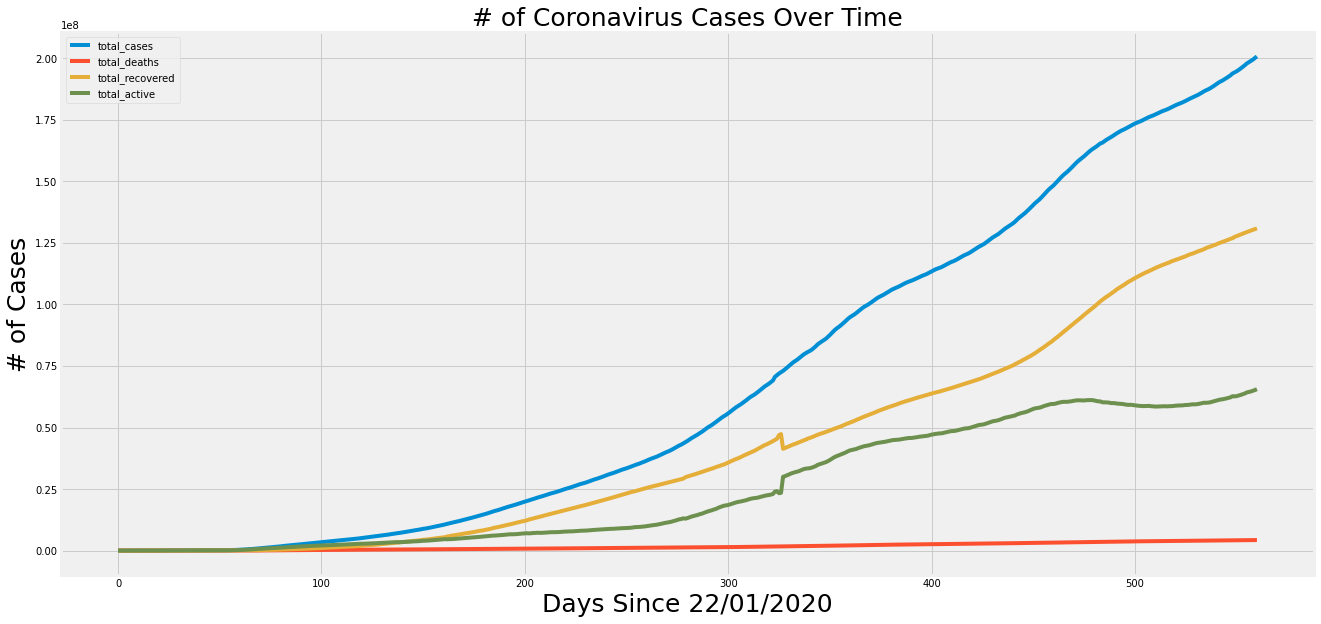

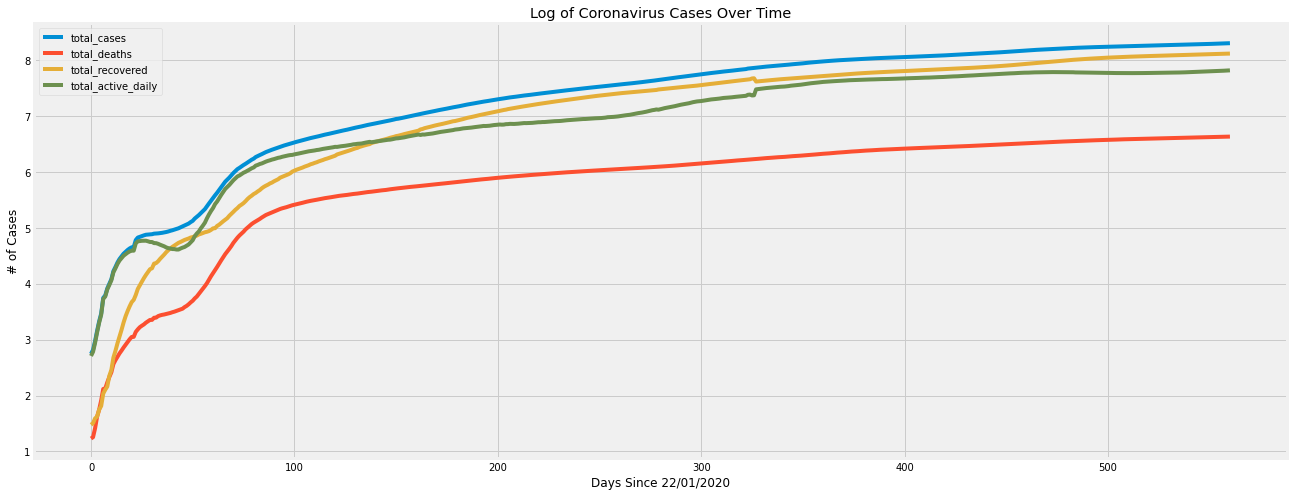

In [ ]:
# Ploting subplot in figure
# Covid data subplot
df_covid.plot(kind='line', figsize=(20,10))

plt.xlabel('Days Since 22/01/2020', fontsize = 25)
plt.ylabel('# of Cases', fontsize=25)
plt.title('# of Coronavirus Cases Over Time', fontsize = 25)

df_covid_log10.plot(kind = 'line', figsize = (20,8))
plt.xlabel('Days Since 22/01/2020')
plt.ylabel('# of Cases')
plt.title('Log of Coronavirus Cases Over Time')
plt.show()

# Problem 3
    Visualize the number of total cases, total deaths, total recovered, and total active, and total active by time (day units) in 4 separated graphs using line chart

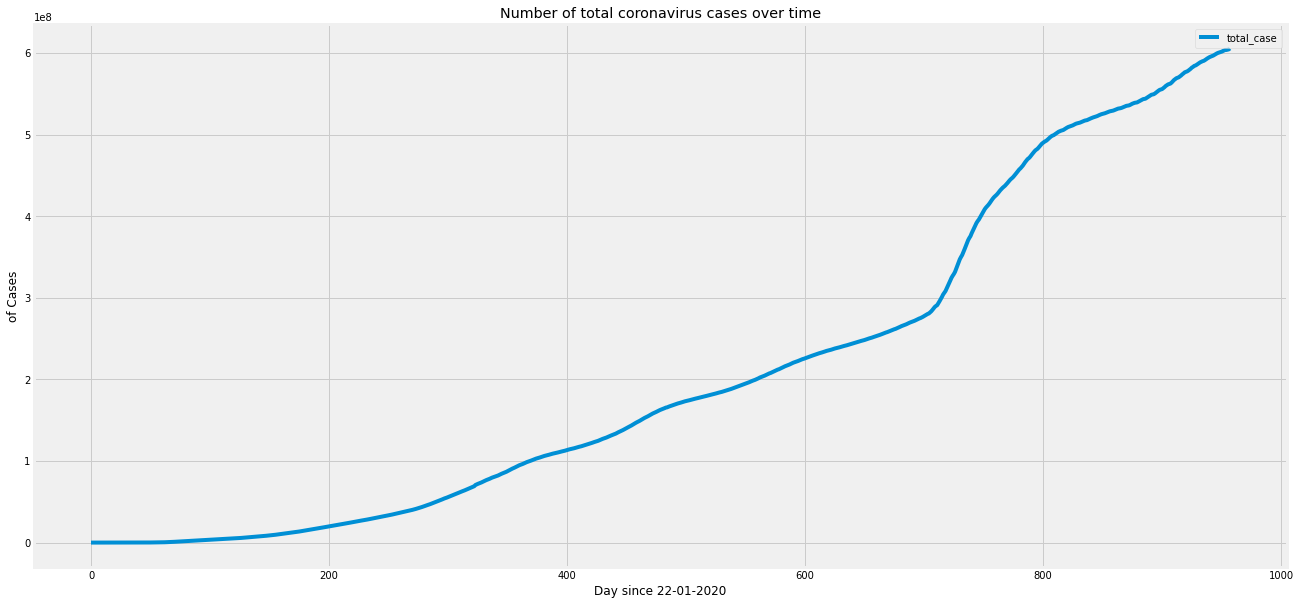

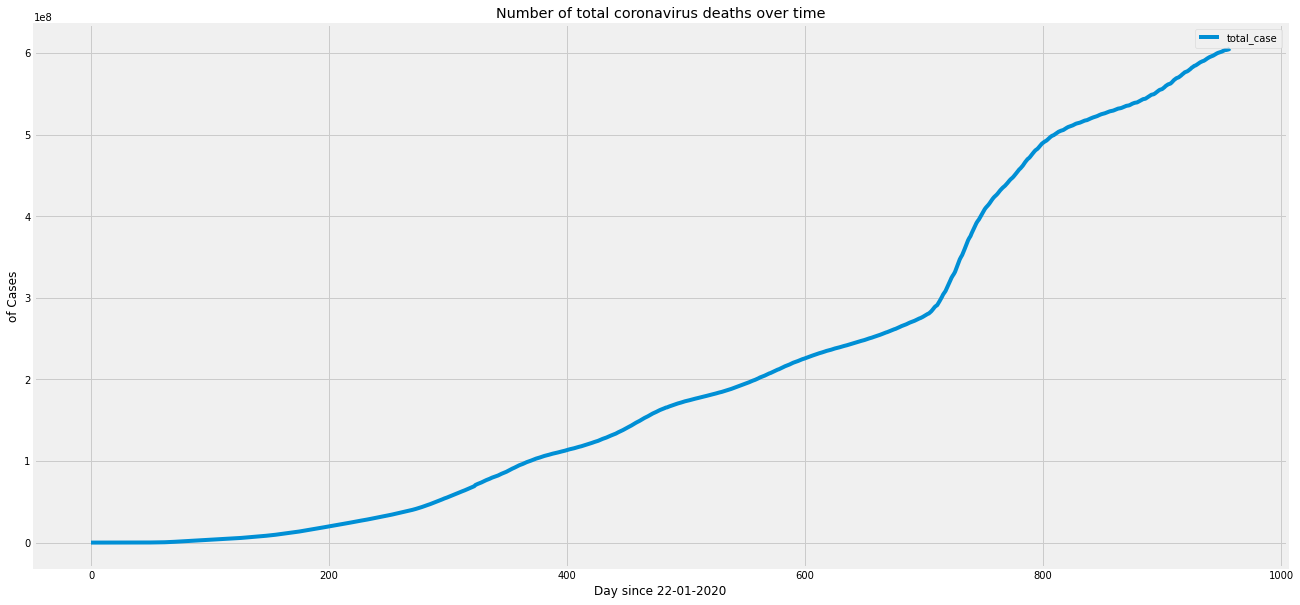

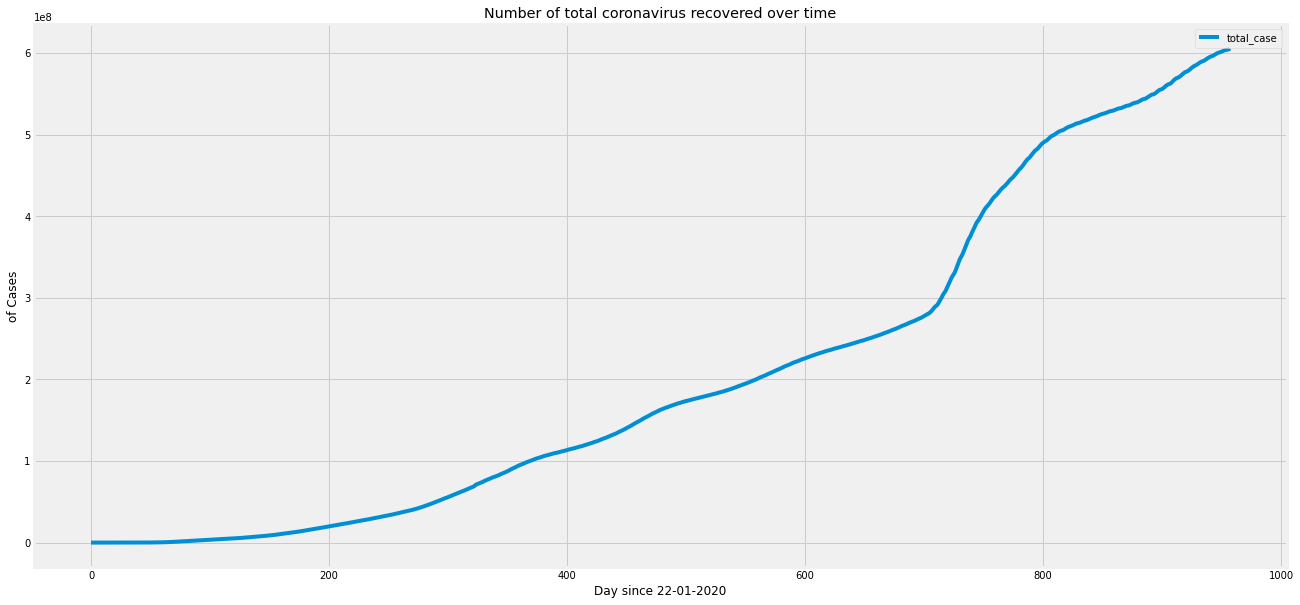

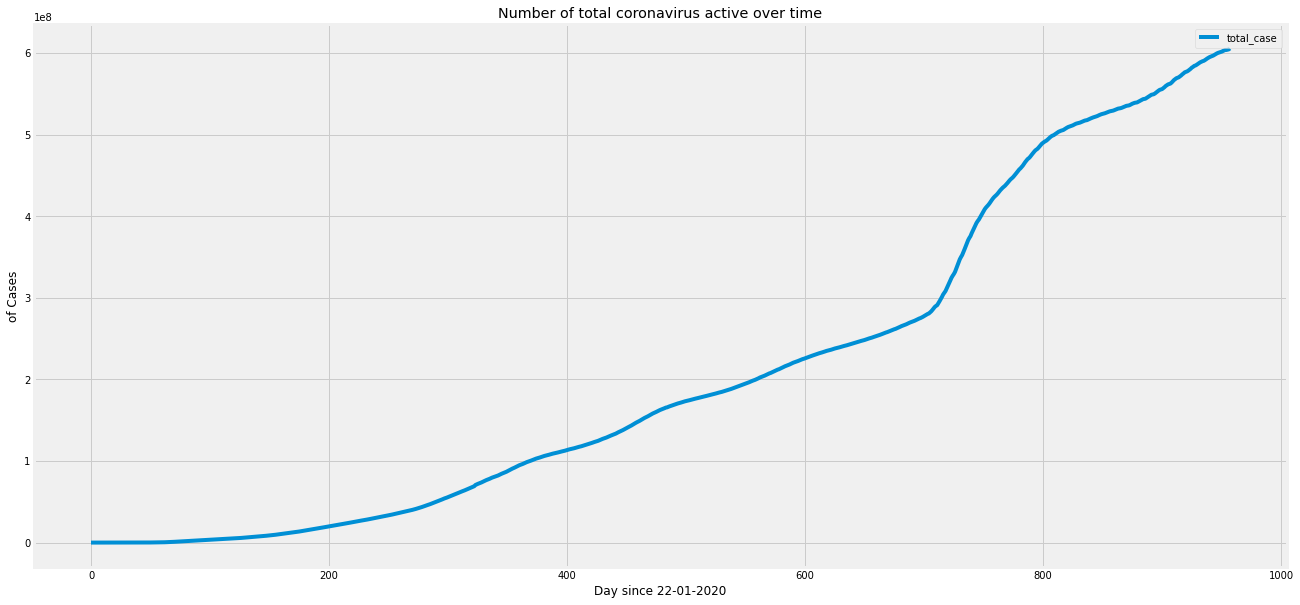

In [ ]:
# total_cases
total_case_df = pd.DataFrame(total_cases,
                             index=adjusted_dates,
                             columns=['total_case'])
total_case_df.plot(kind='line', figsize=(20,10))
plt.title('Number of total coronavirus cases over time')
plt.xlabel('Day since 22-01-2020')
plt.ylabel('of Cases')
plt.show()

# total_deaths
total_deaths_df = pd.DataFrame(total_deaths,
                             index=adjusted_dates,
                             columns=['total_deaths'])
total_case_df.plot(kind='line', figsize=(20,10))
plt.title('Number of total coronavirus deaths over time')
plt.xlabel('Day since 22-01-2020')
plt.ylabel('of Cases')
plt.show()

# total_recoveries
total_recoveries_df = pd.DataFrame(total_recovered,
                             index=adjusted_dates,
                             columns=['total_recovered'])
total_case_df.plot(kind='line', figsize=(20,10))
plt.title('Number of total coronavirus recovered over time')
plt.xlabel('Day since 22-01-2020')
plt.ylabel('of Cases')
plt.show()

# total_active
total_active_df = pd.DataFrame(total_active,
                             index=adjusted_dates,
                             columns=['total_active'])
total_case_df.plot(kind='line', figsize=(20,10))
plt.title('Number of total coronavirus active over time')
plt.xlabel('Day since 22-01-2020')
plt.ylabel('of Cases')
plt.show()

# Problem 4
    Calculate the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units).

Concatenate pandas objects along a particular axis with optional set logic along the other axes.

Can also add a layer of hierarchical indexing on the concatenation axis, which may be useful if the labels are the same (or overlapping) on the passed axis number.

In [ ]:
df_covid_previous_day = pd.concat([df_covid[0:1], df_covid[:-1]], axis=0, ignore_index=True)
df_covid_increase_daily = df_covid - df_covid_previous_day
df_covid_increase_daily

,total_cases,total_deaths,total_recovered,total_active
0,0,0,0,0
1,100,1,2,97
2,287,8,7,272
3,493,16,3,474
4,683,14,14,655
...,...,...,...,...
953,657370,2527,0,654843
954,-62447,-4063,0,-58384
955,372629,973,0,371656
956,367926,1052,0,366874


# Problem 5
    Visualize the number of daily increase in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.

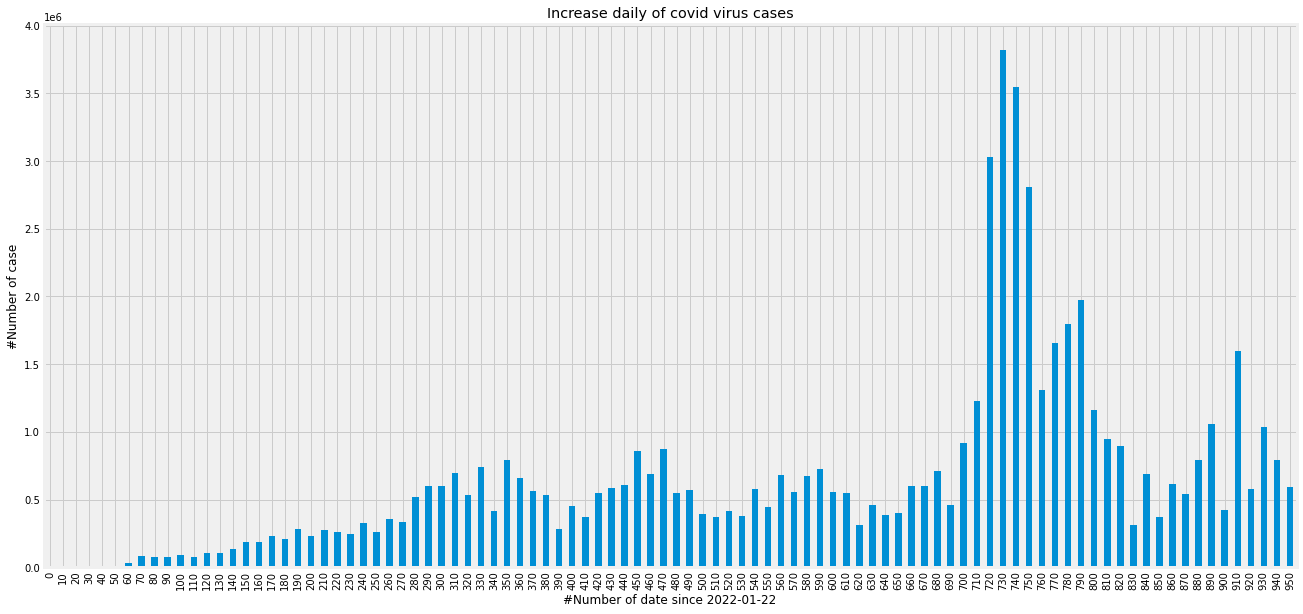

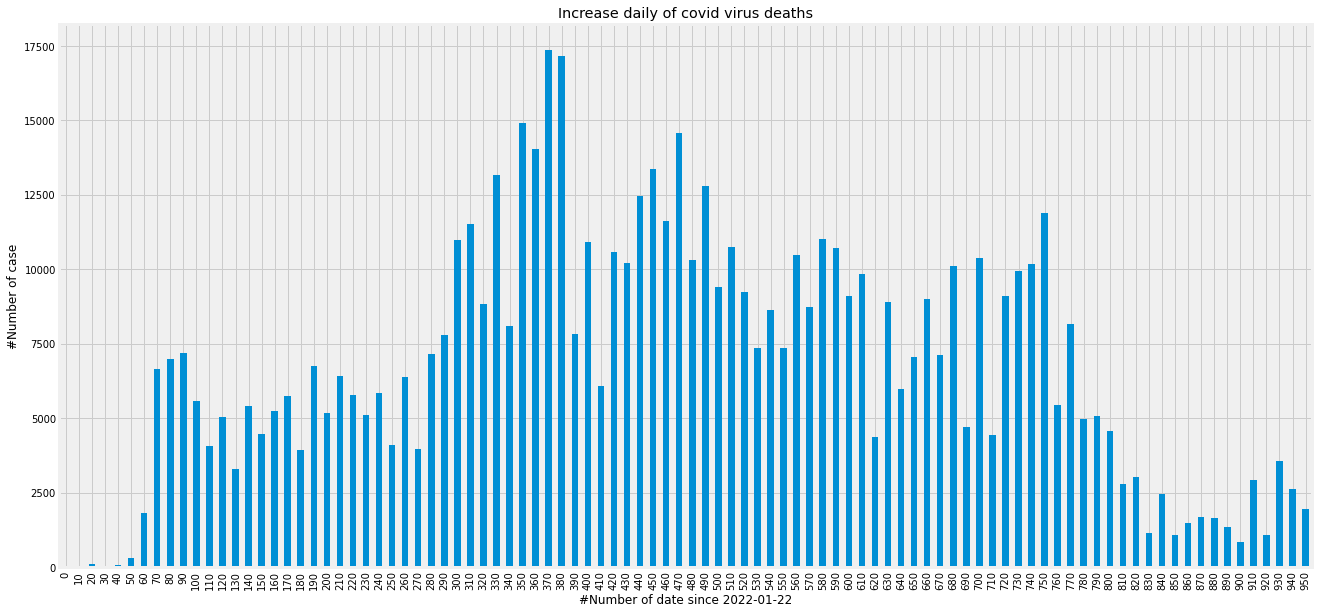

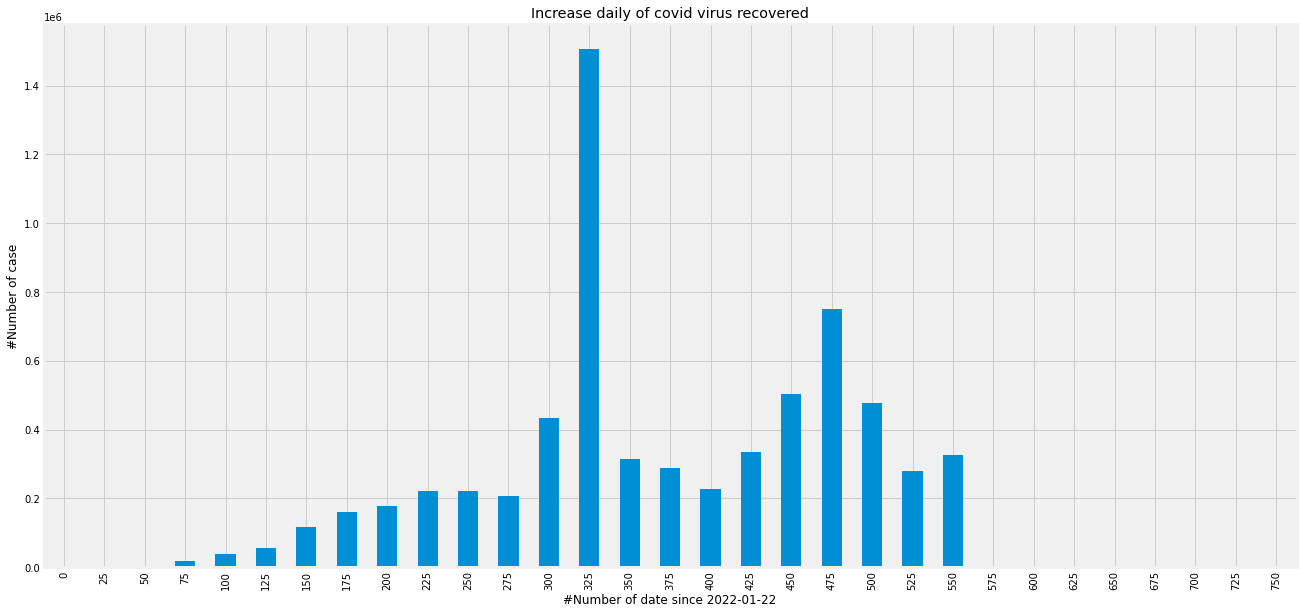

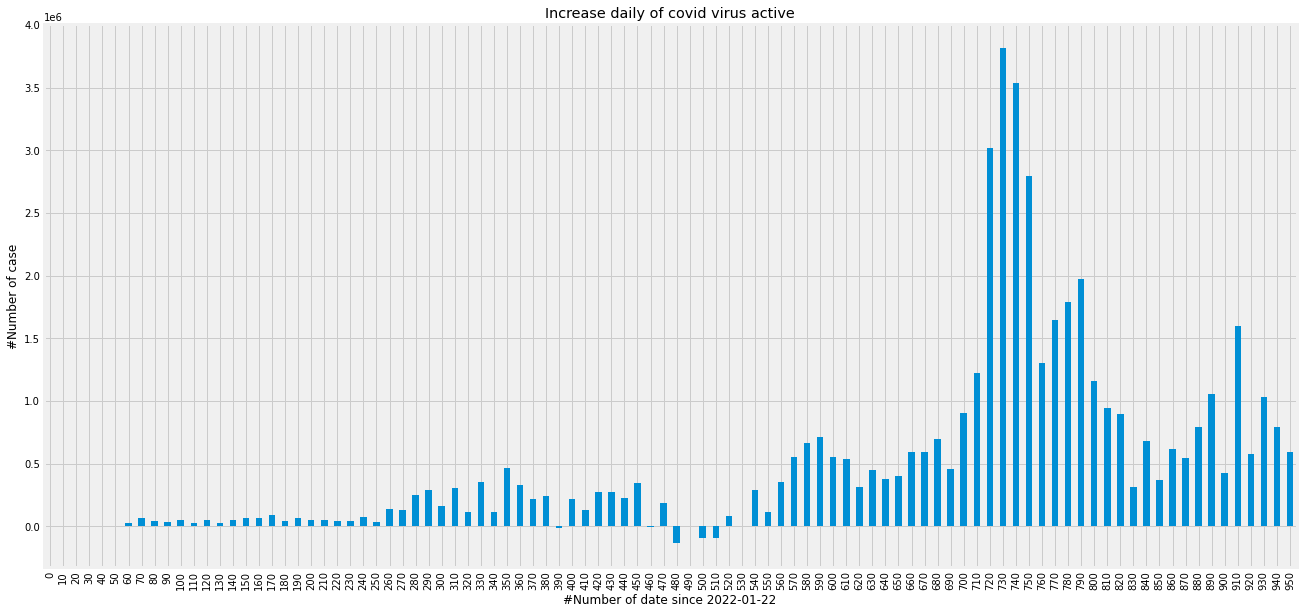

In [ ]:
# daily increase in total cases
df_total_case_increase_daily = df_covid_increase_daily['total_cases'].loc[0:1000:10]
df_total_case_increase_daily.plot(kind = 'bar', figsize=(20,10))
plt.title('Increase daily of covid virus cases')
plt.xlabel('#Number of date since 2022-01-22')
plt.ylabel('#Number of case')
plt.show()

# daily increase in total deaths
df_total_deaths_increase_daily = df_covid_increase_daily['total_deaths'].loc[0:1000:10]
df_total_deaths_increase_daily.plot(kind = 'bar', figsize=(20,10))
plt.title('Increase daily of covid virus deaths')
plt.xlabel('#Number of date since 2022-01-22')
plt.ylabel('#Number of case')
plt.show()

# daily increase in total recovered
df_total_recovered_increase_daily = df_covid_increase_daily['total_recovered'].loc[0:750:25]
df_total_recovered_increase_daily.plot(kind = 'bar', figsize=(20,10))
plt.title('Increase daily of covid virus recovered')
plt.xlabel('#Number of date since 2022-01-22')
plt.ylabel('#Number of case')
plt.show()

# daily increase in total active
df_total_active_increase_daily = df_covid_increase_daily['total_active'].loc[0:1000:10]
df_total_active_increase_daily.plot(kind = 'bar', figsize=(20,10))
plt.title('Increase daily of covid virus active')
plt.xlabel('#Number of date since 2022-01-22')
plt.ylabel('#Number of case')
plt.show()

# Problem 6
    Calculate the global mortality and recovered rate in percentage by time

In [ ]:
mortality_rate=(df_covid['total_deaths']/df_covid['total_cases'])*100
recovered_rate=(df_covid['total_recovered']/df_covid['total_cases'])*100
# Create covid percentage df
df_covid_percentage = pd.DataFrame(zip(mortality_rate,recovered_rate),
                                   index=adjusted_dates,
                                   columns=['mortality_rate','recovered_rate'])
df_covid_percentage

,mortality_rate,recovered_rate
0,3.052065,5.385996
1,2.739726,4.870624
2,2.754237,4.131356
3,2.922756,2.922756
4,2.641509,2.641509
...,...,...
953,1.076201,0.000000
954,1.075639,0.000000
955,1.075136,0.000000
956,1.074656,0.000000


# Problem 7

**7.1**

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

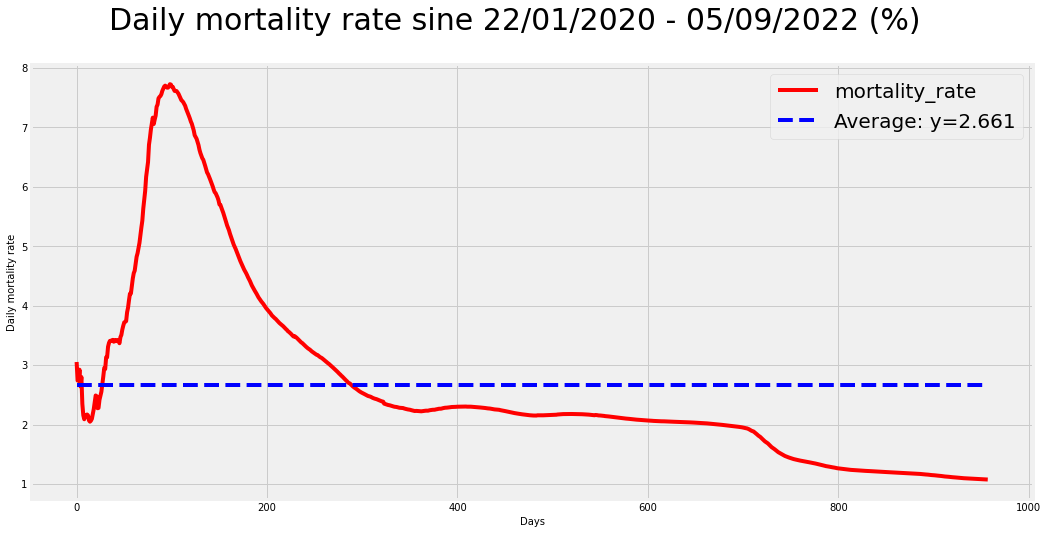

In [ ]:
df_covid_percentage['mortality_rate'].plot(kind='line', color='red', figsize = (16,8))

plt.suptitle('Daily mortality rate sine 22/01/2020 - 05/09/2022 (%)', fontsize = 30)
plt.xlabel('Days', fontsize = 10)
plt.ylabel('Daily mortality rate', fontsize = 10)

# Calculate the average of mortality_rate
avg_number = round(df_covid_percentage['mortality_rate'].mean(),3)
avg_arr = [avg_number for i in range(len(df_covid_percentage['mortality_rate']))]

# Plot the average line to the chart
plt.plot(avg_arr, ls="--", color='blue', label=f"Average: y={avg_number}")
plt.legend(fontsize=20)
plt.show()

**7.2**

    Visualize the recovery rate in by time (day units) using the line chart.

    Using the dashline to visualize the average recovery rate of all the time.

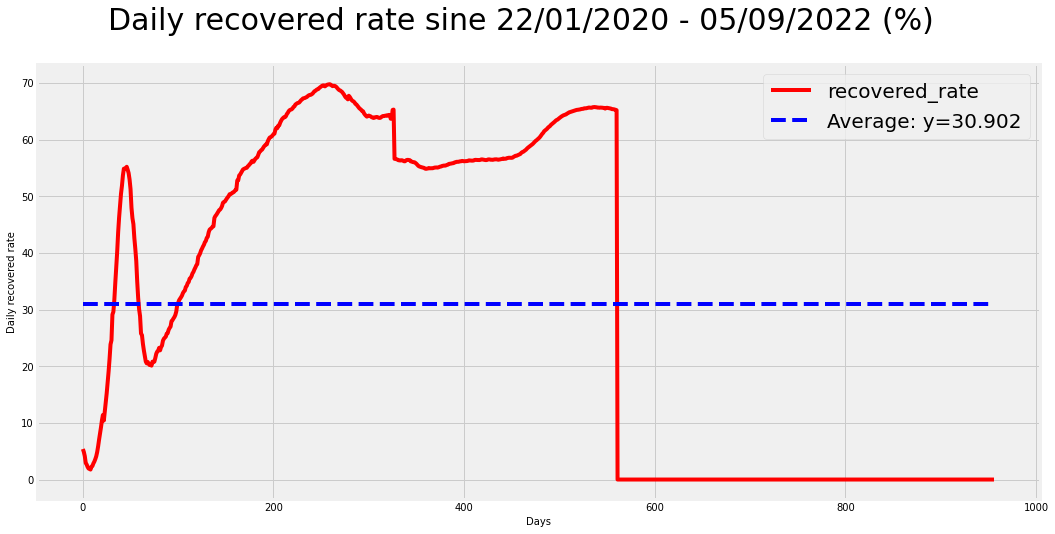

In [ ]:
df_covid_percentage['recovered_rate'].plot(kind='line', color='red', figsize = (16,8))

plt.suptitle('Daily recovered rate sine 22/01/2020 - 05/09/2022 (%)', fontsize = 30)
plt.xlabel('Days', fontsize = 10)
plt.ylabel('Daily recovered rate', fontsize = 10)

# Calculate the average of mortality_rate
avg_number = round(df_covid_percentage['recovered_rate'].mean(),3)
avg_arr = [avg_number for i in range(len(df_covid_percentage['recovered_rate']))]

# Plot the average line to the chart
plt.plot(avg_arr, ls="--", color='blue', label=f"Average: y={avg_number}")
plt.legend(fontsize=20)
plt.show()

# Continent Analysis

# Data Prerocessing

In [ ]:
# Changing the country names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == "Korea, South", "Country/Region"] = "Korea, South"
deaths_df.loc[deaths_df['Country/Region'] == "Korea, South", "Country/Region"] = "Korea, South"
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "Korea, South"

confirmed_df.loc[confirmed_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan*"
deaths_df.loc[deaths_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan*"
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan*"

confirmed_df.loc[confirmed_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Congo (Kinshasa)"
deaths_df.loc[deaths_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Congo (Kinshasa)"
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Congo (Kinshasa)"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Cote d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Cote d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Cote d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Reunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Reunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Reunion"

confirmed_df.loc[confirmed_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Congo (Brazzaville)"
deaths_df.loc[deaths_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Congo (Brazzaville)"
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Congo (Brazzaville)"


confirmed_df.loc[confirmed_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas, The"
deaths_df.loc[deaths_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas, The"
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas, The"

confirmed_df.loc[confirmed_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia, The"
deaths_df.loc[deaths_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia, The"
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia, The"

# getting all countries
coutries = np.array(confirmed_df["Country/Region"])
coutries1 = np.array(deaths_df["Country/Region"])
coutries2 = np.array(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America',
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe',
    'na': 'Others'
}

# Defining Function for getting continent code for country
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except:
        return 'na'

# Problem 8
    Add the field "continent" into the confirm_df, deaths_df and recoveries_df dataset:

In [ ]:
#Insert your code here: 

#1.confirmed_df 
#Adding continent into confirmed_df
#setting each country to continent
list_conti_code = [country_to_continent_code(country) for country in confirmed_df['Country/Region']]
#get list continent name from list_conti_code 
list_continent = [continents[conti_code] for conti_code in list_conti_code]
# Add continent column
confirmed_df['Continent'] = list_continent
#confirmed_df['continent']

new_position_continent = ['Province/State','Country/Region','Lat','Long','Continent'] + dates
confirmed_df = confirmed_df[new_position_continent]

#2.recoveries_df 
#setting each country to continent 
list_countries = []
list_continent_reco_code = []
for country in recoveries_df['Country/Region']:
    list_countries.append(country)
for country in list_countries:
    list_continent_reco_code.append(country_to_continent_code(country))
#add conti_code to conti_name 
list_continent_reco = []    
for conti_code in list_continent_reco_code:
    list_continent_reco.append(continents[conti_code])
#add continent to recoveries_df 
recoveries_df['Continent'] = list_continent_reco
#change the postion of continent in recoveries_df
recoveries_df = recoveries_df[new_position_continent]
#3.deaths_df 
#setting each country to contient 
list_countries_death =[]
list_continent_death_code = []
for country in deaths_df['Country/Region']:
    list_countries_death.append(country)
for country in list_countries_death:
    list_continent_death_code.append(country_to_continent_code(country))
#add conti_death_code to conti_name 
list_continent_death = []
for death_code in list_continent_death_code:
    list_continent_death.append(continents[death_code])
deaths_df['Continent'] = list_continent_death
#change the position of continent in deaths_df 
deaths_df = deaths_df[new_position_continent]
deaths_df

,Province/State,Country/Region,Lat,Long,Continent,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.939110,67.709953,Asia,0,0,0,0,0,...,6477,6515,6577,6615,6677,6708,6737,6774,6804,6836
1,NaN,Albania,41.153300,20.168300,Europe,0,0,0,0,0,...,2456,2456,2457,2457,2457,2457,2457,2457,2457,2457
2,NaN,Algeria,28.033900,1.659600,Africa,0,0,0,0,0,...,4087,4112,4161,4189,4219,4254,4291,4329,4370,4404
3,NaN,Andorra,42.506300,1.521800,Europe,0,0,0,0,0,...,127,127,127,127,128,128,128,128,128,128
4,NaN,Angola,-11.202700,17.873900,Africa,0,0,0,0,0,...,991,994,1000,1003,1008,1011,1016,1018,1022,1026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,NaN,West Bank and Gaza,31.952200,35.233200,Others,0,0,0,0,0,...,3599,3600,3601,3601,3601,3603,3604,3609,3609,3609
281,NaN,Winter Olympics 2022,39.904200,116.407400,Others,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
282,NaN,Yemen,15.552727,48.516388,Asia,0,0,0,0,0,...,1373,1374,1374,1374,1375,1375,1377,1378,1380,1380
283,NaN,Zambia,-13.133897,27.849332,Africa,0,0,0,0,0,...,3295,3316,3338,3355,3376,3389,3406,3412,3422,3430


# Problem 9

    Create the countries_df data frame with the index as the "Country/Region" field.
    These column infor will be:
    - continent: Country continent.
    - Confirmed: Total number of confirmed.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality rate: Mortality rate in percentage.

In [ ]:
# 1. set index for countries infor df
# continent: Country continent.
list_countries = confirmed_df.drop_duplicates(subset=['Country/Region'])
list_countries.set_index(['Country/Region'], inplace = True)
countries_info = list_countries[['Lat', 'Long', 'Continent']]
countries_info

,Lat,Long,Continent
Country/Region,,,
Afghanistan,33.939110,67.709953,Asia
Albania,41.153300,20.168300,Europe
Algeria,28.033900,1.659600,Africa
Andorra,42.506300,1.521800,Europe
Angola,-11.202700,17.873900,Africa
...,...,...,...
West Bank and Gaza,31.952200,35.233200,Others
Winter Olympics 2022,39.904200,116.407400,Others
Yemen,15.552727,48.516388,Asia


In [ ]:
# 1. Create confirmed cases by contry_df
list_confirmed = confirmed_df.groupby(['Country/Region']).sum()
countries_confirmed = list_confirmed.iloc[:,-1]

# 2. Create deaths case by country_df
list_deaths = deaths_df.groupby(['Country/Region']).sum()
countries_deaths = list_deaths.iloc[:,-1]

# 3. Create recoveries case by country_df
list_recoveries = recoveries_df.groupby(['Country/Region']).sum()
countries_recoveries = list_recoveries.iloc[:,-1]

# Naming all column above
countries_confirmed.name = 'Confirmed'
countries_deaths.name = 'Deaths'
countries_recoveries.name = 'Recoveries'

# Create requirement table
countries_df = pd.concat([countries_info, countries_confirmed, countries_deaths, countries_recoveries], axis = 1)
# 4. Create df_total_active_increase_daily
countries_df['Active'] = countries_df['Confirmed'] - (countries_df['Recoveries']+countries_df['Deaths'])

# 5. Create mortality rate by country_df
countries_df['Mortality_rate'] = round(countries_df['Deaths']*100/countries_df['Confirmed'], 2)

# Check error value
countries_df[countries_df['Active'] < 0] # Active column contain 1 negative value

# There are 3 countries with wrong data are: Austria, Guyana, Peru. Drop them!
# countries_df.drop(['Guyana', 'Peru', 'Austria'], inplace = True) # Drop three countries have an Error data

# Check missing data
countries_df.isna().sum()
countries_df.dropna(inplace=True) # Drop nan rows
countries_df

,Lat,Long,Continent,Confirmed,Deaths,Recoveries,Active,Mortality_rate
Country/Region,,,,,,,,
Afghanistan,33.939110,67.709953,Asia,148933,6836,82586,59511,4.59
Albania,41.153300,20.168300,Europe,133310,2457,130314,539,1.84
Algeria,28.033900,1.659600,Africa,176724,4404,118409,53911,2.49
Andorra,42.506300,1.521800,Europe,14797,128,14380,289,0.87
Angola,-11.202700,17.873900,Africa,43158,1026,39582,2550,2.38
...,...,...,...,...,...,...,...,...
Vietnam,14.058324,108.277199,Asia,181756,2327,54332,125097,1.28
West Bank and Gaza,31.952200,35.233200,Others,317404,3609,312320,1475,1.14
Yemen,15.552727,48.516388,Asia,7096,1380,4251,1465,19.45


# Problem 10
    Create the continents_df data frame with the index as the "Continent" field.
    - Confirmed: Country continent.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [ ]:
# groupby dataframe by continent:
continent_confirmed = confirmed_df.groupby('Continent').sum()
continent_deaths = deaths_df.groupby('Continent').sum()
continent_recoveries = recoveries_df.groupby('Continent').sum()

# Sum total confirmed, total deaths, total recoveries by continent in the latest day
df_confirmed = continent_confirmed.iloc[:,-1]
df_deaths = continent_deaths.iloc[:,-1]
df_recoveries = continent_recoveries.iloc[:,-1]
df_active = df_confirmed - (df_deaths + df_recoveries)
continent_mortality_rate = round(df_deaths*100/df_confirmed,2)

# Naming three Series above
df_confirmed.name = 'Confirmed'
df_deaths.name = 'Deaths'
df_recoveries.name = 'Recoveries'
df_active.name = 'Active'
continent_mortality_rate.name = 'Mortality Rate'

# Create continents dataframe
continents_df = pd.concat([df_confirmed,df_deaths,df_recoveries,df_active,continent_mortality_rate], axis = 1)
continents_df

,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Continent,,,,,
Africa,6740943,172443,5863025,705475,2.56
Asia,62315282,899851,57659667,3755764,1.44
Australia,90000,1425,55290,33285,1.58
Europe,52448545,1167092,27947075,23334378,2.23
North America,42355130,924576,5776939,35653615,2.18
Others,1089661,21071,940397,128193,1.93
South America,35722194,1096367,32656668,1969159,3.07


# Sample line ploting
Here are the sample functions for visualizing covid cases by time in each continent/country:

In [ ]:
def plot_params(ax, axis_label=None, plt_title = None, label_size = 15, axis_fsize = 15, title_fsize = 20, scale = 'linear'):
    # Tick-parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1, labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')
    
    # Plot Title
    plt.title(plt_title,{'fontsize': title_fsize})
    
    # Yaxis scale
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0], fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1], fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None, country=None, state=None, period=None, figure=None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else:
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1], figure[2], figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["Continent", continent]
    elif country != None:
        params = ["country", country]
    else:
        params = ["All", "All"]
    color = ["blue", "red", "green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o', markersize=4, markerfacecolor='#ffffff')
    for i, stat in enumerate(stats):
        if params[1] == "All":
            cases = np.sum(np.asarray(stat.iloc[:,5:]), axis=0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]), axis=0)[x:]
        date = np.arange(1, cases.shape[0]+1)[x:]
        plt.plot(date, cases, label = label[i]+" (Total: " + str(cases[-1])+")", color=color[i], **marker_style)
        plt.fill_between(date, cases, color=color[i], alpha=0.3)
    if params[1] == "All":
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis=0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis=0)[x:]
    else:
        Total_confirmed = np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]), axis=0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]), axis=0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate: " + str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " +str(Total_confirmed[-1] - Total_confirmed[-6]) + "\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6]) + "\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2]) + "\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2]) + "\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+"-"+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax, axis_label, scale=scale)
    
    # Plot Title
    if params[1] == "All":
        plt.title("Covid-19 Cases World", {'fontsize':25})
    else:
        plt.title("Covid-19: "+params[1], {'fontsize':25})
    
    # Legend Location
    l = plt.legend(loc="best", fontsize = 15)
    
    if figure == None:
        plt.show()

# Problem 11
**11.1**

    Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed.

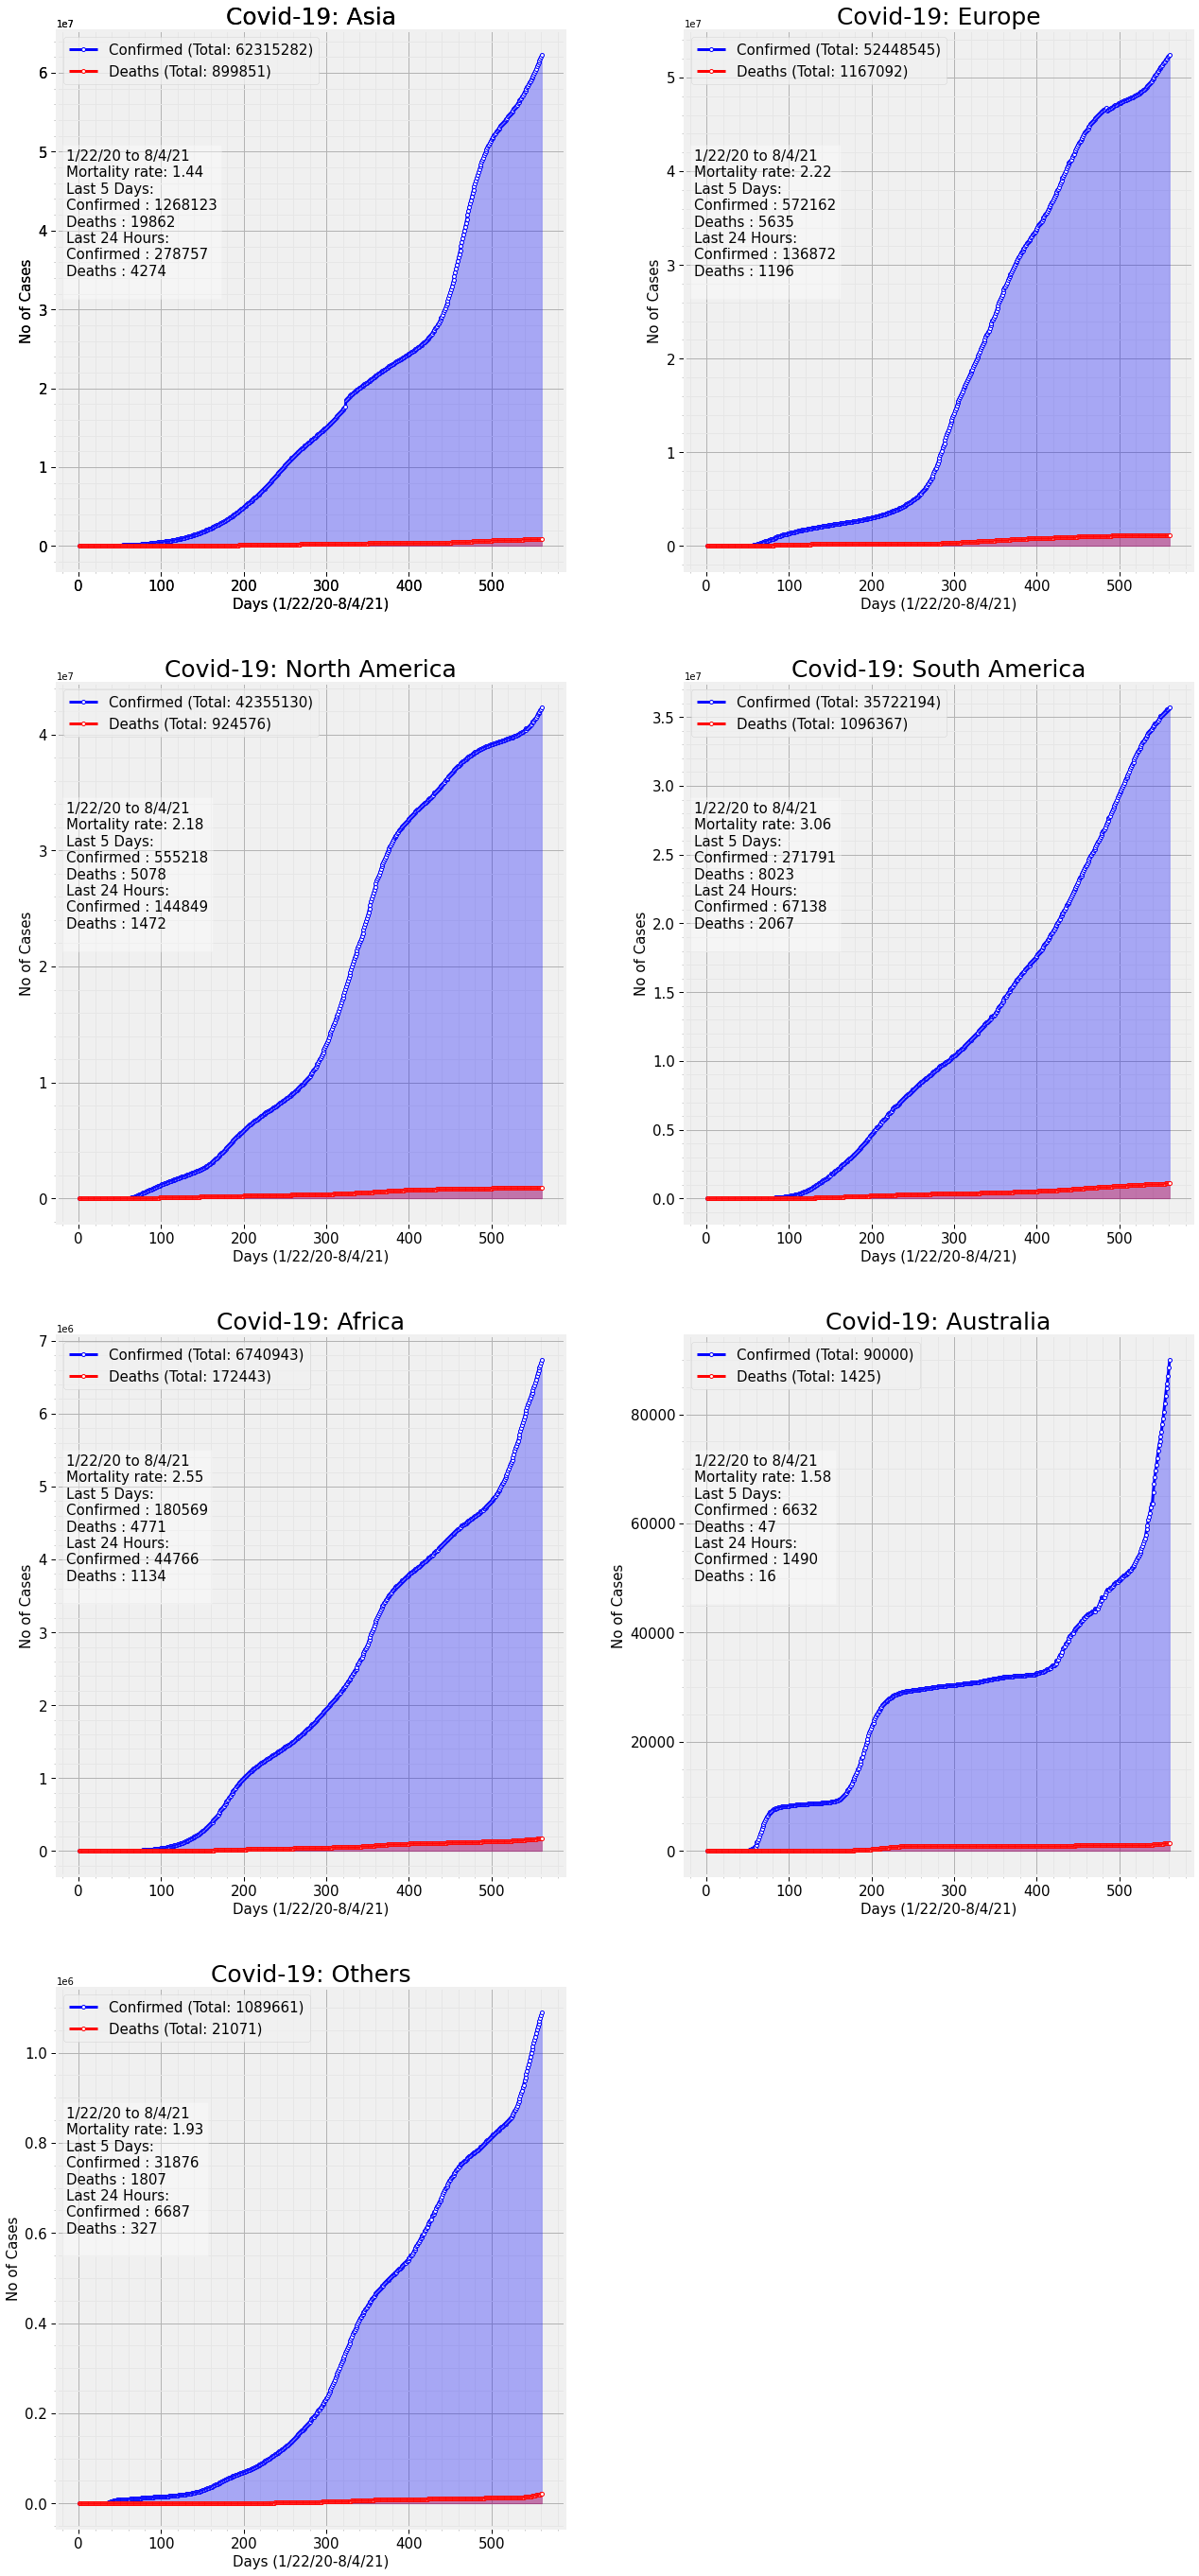

In [ ]:
# Create 7 subplots
figure = plt.figure(figsize=(20,40))
fig1 = [figure, 4,2,1]
fig2 = [figure, 4,2,2]
fig3 = [figure, 4,2,3]
fig4 = [figure, 4,2,4]
fig5 = [figure, 4,2,5]
fig6 = [figure, 4,2,6]
fig7 = [figure, 4,2,7]


visualize_covid_cases(confirmed_df, deaths_df,
                          continents['AS'] , country = None , state = None, period = None, figure =fig1,
                          scale = "linear")


visualize_covid_cases(confirmed_df, deaths_df,
                      continents['AS'], country = None, state = None, period = None, figure = fig1,
                      scale="linear")

visualize_covid_cases(confirmed_df, deaths_df,
                      continents['EU'], country = None, state = None, period = None, figure = fig2,
                      scale="linear")

visualize_covid_cases(confirmed_df, deaths_df,
                      continents['NA'], country = None, state = None, period = None, figure = fig3,
                      scale="linear")

visualize_covid_cases(confirmed_df, deaths_df,
                      continents['SA'], country = None, state = None, period = None, figure = fig4,
                      scale="linear")

visualize_covid_cases(confirmed_df, deaths_df,
                      continents['AF'], country = None, state = None, period = None, figure = fig5,
                      scale="linear")

visualize_covid_cases(confirmed_df, deaths_df,
                      continents['OC'], country = None, state = None, period = None, figure = fig6,
                      scale="linear")

visualize_covid_cases(confirmed_df, deaths_df,
                      continents['na'], country = None, state = None, period = None, figure = fig7,
                      scale="linear")

**11.2**

    Modify the "plot_params" and "visualize_covid_cases" function to:
    - Show up the results of the last 7 days instead of 5 days.
    - Add the "Recoveries line" to the main chart.
    - Add the "Total Recoveries" number to the small table.
    - Add the "Recoveries" filed in the last 7 days and 24 hours to the information menu.

In [ ]:
#Insert your code here:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
#add recoveries as new param    
def visualize_covid_cases(confirmed, deaths,recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    #add recoveries
    stats = [confirmed, deaths,recoveries]
    label = ["Confirmed", "Deaths","Recoveries"]
    if continent != None:
        params = ["Continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","yellow"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
    
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    #add recoveries
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    #add recoveries
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        
        plt.show()
    

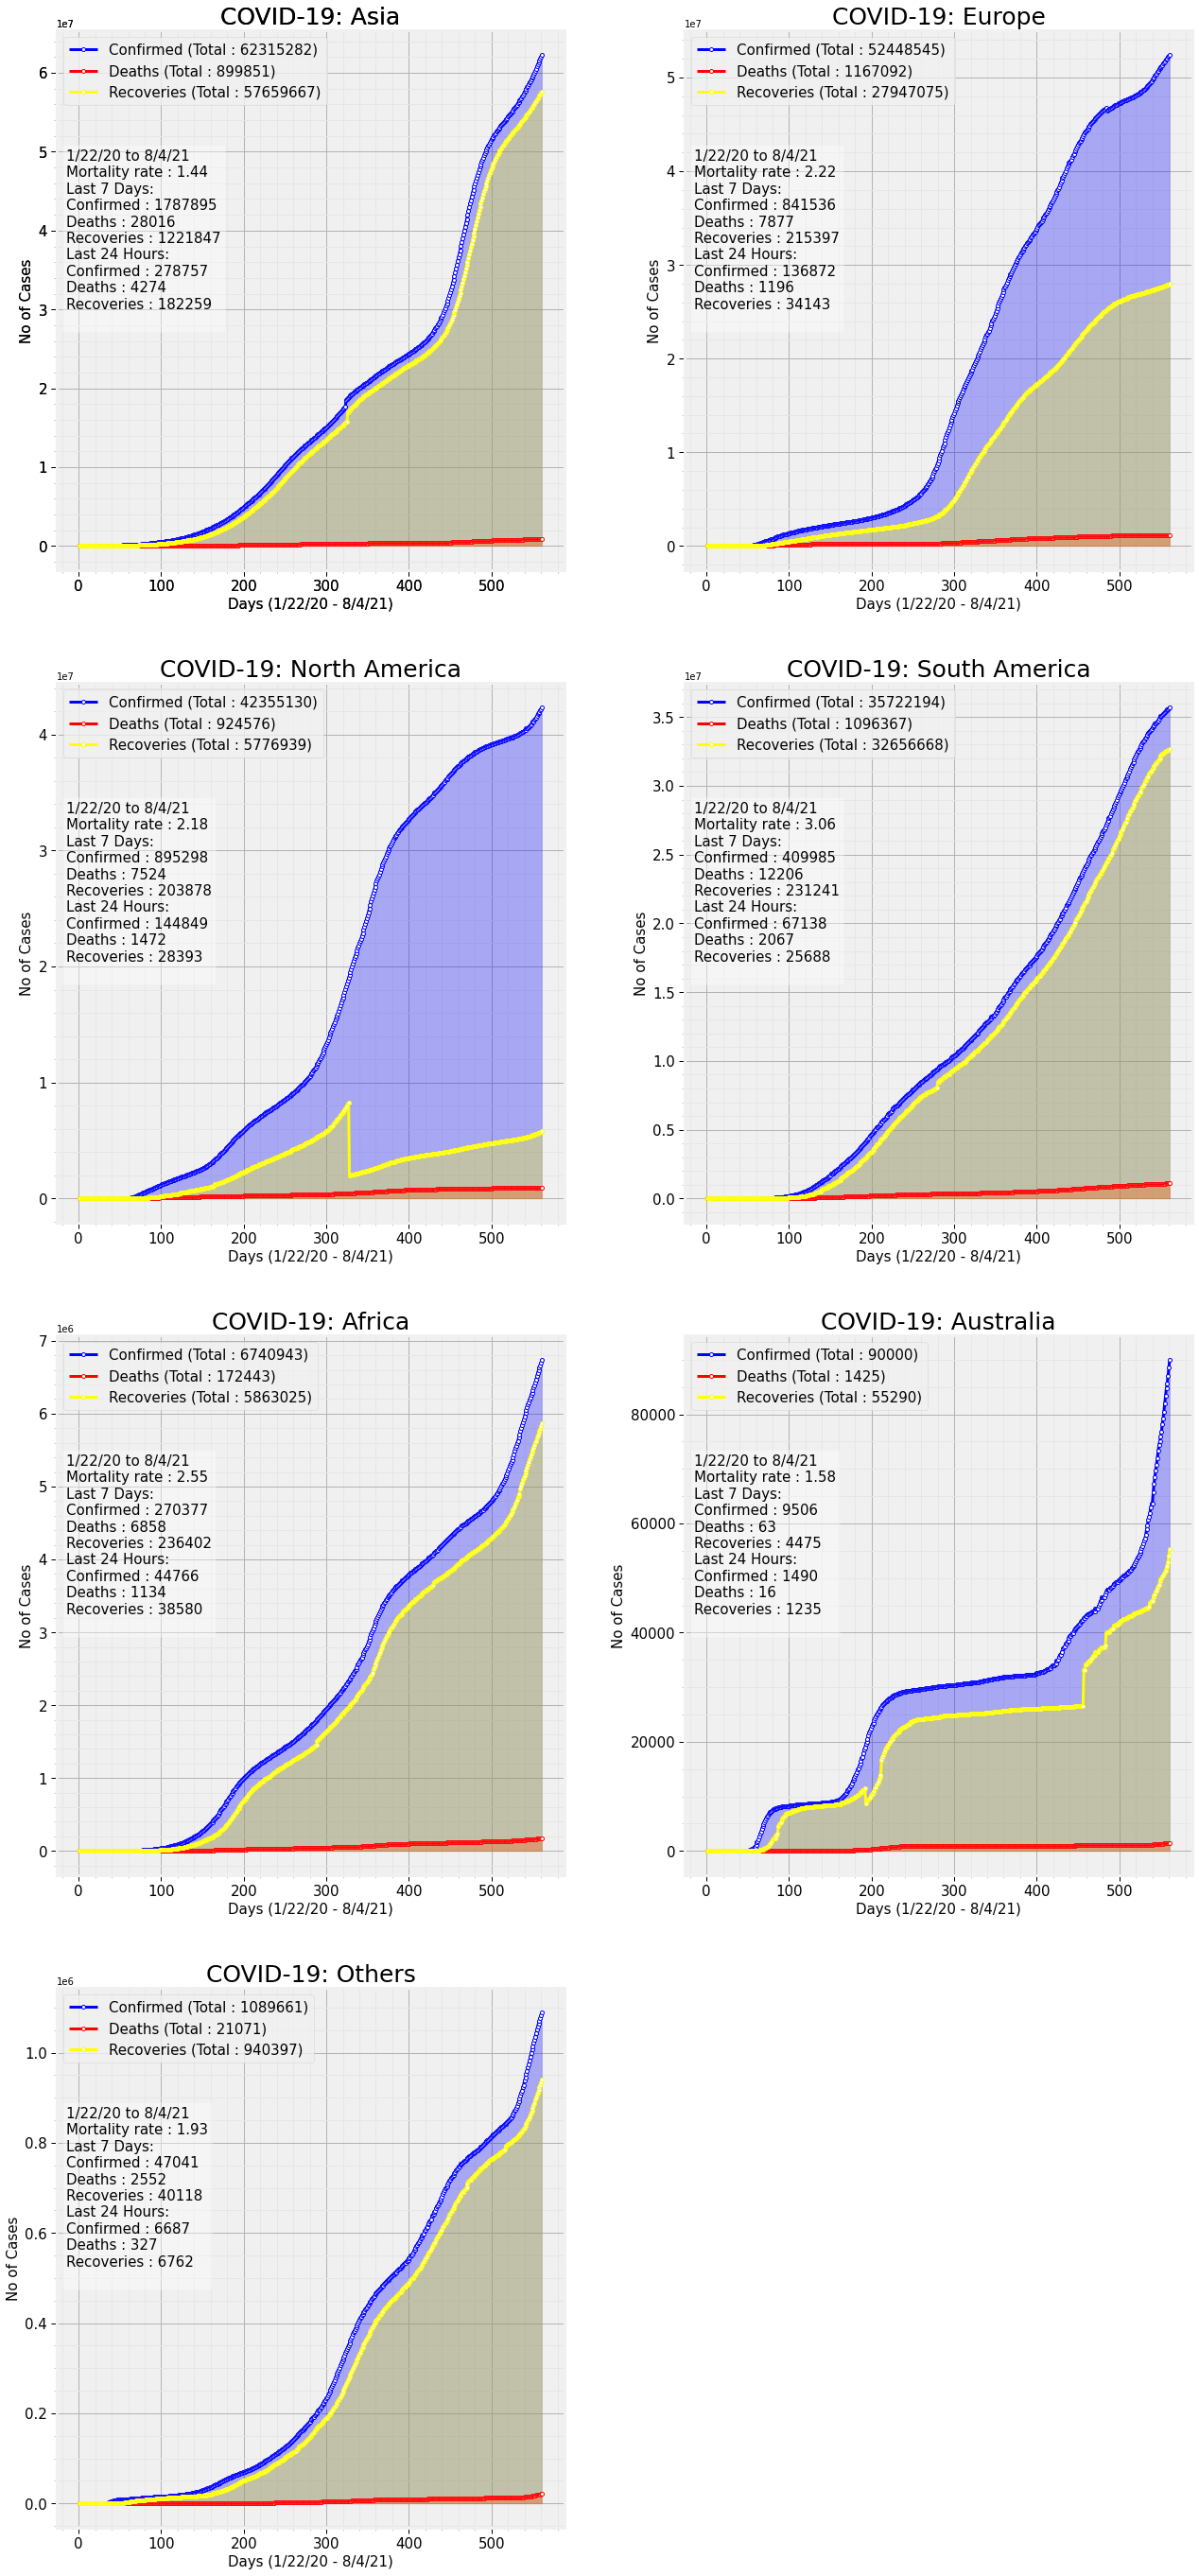

In [ ]:
# Create 7 subplots
figure = plt.figure(figsize=(20,40))
fig1 = [figure, 4,2,1]
fig2 = [figure, 4,2,2]
fig3 = [figure, 4,2,3]
fig4 = [figure, 4,2,4]
fig5 = [figure, 4,2,5]
fig6 = [figure, 4,2,6]
fig7 = [figure, 4,2,7]


visualize_covid_cases(confirmed_df, deaths_df, recoveries_df,
                          continents['AS'] , country = None , state = None, period = None, figure =fig1,
                          scale = "linear")


visualize_covid_cases(confirmed_df, deaths_df, recoveries_df,
                      continents['AS'], country = None, state = None, period = None, figure = fig1,
                      scale="linear")

visualize_covid_cases(confirmed_df, deaths_df, recoveries_df,
                      continents['EU'], country = None, state = None, period = None, figure = fig2,
                      scale="linear")

visualize_covid_cases(confirmed_df, deaths_df, recoveries_df,
                      continents['NA'], country = None, state = None, period = None, figure = fig3,
                      scale="linear")

visualize_covid_cases(confirmed_df, deaths_df, recoveries_df,
                      continents['SA'], country = None, state = None, period = None, figure = fig4,
                      scale="linear")

visualize_covid_cases(confirmed_df, deaths_df, recoveries_df,
                      continents['AF'], country = None, state = None, period = None, figure = fig5,
                      scale="linear")

visualize_covid_cases(confirmed_df, deaths_df, recoveries_df,
                      continents['OC'], country = None, state = None, period = None, figure = fig6,
                      scale="linear")

visualize_covid_cases(confirmed_df, deaths_df, recoveries_df,
                      continents['na'], country = None, state = None, period = None, figure = fig7,
                      scale="linear")

# Problem 12
    Visualize the covariance matric for continent_df

<AxesSubplot:>

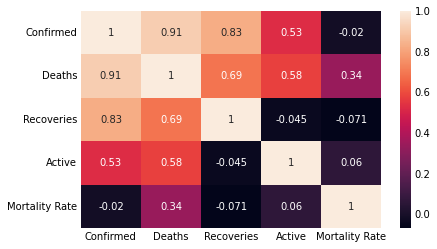

In [ ]:
continent_corr = continents_df.corr()
sns.heatmap(continent_corr, annot=True)

# Problem 13
    Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents.<br>
    Each field (confirm, deaths,...) should be presented in different pie charts.<br>
    You are not allowed to use repeated code snippet here, let try to use a for loop.<br>
    Each continent should be presented in different colors.

In [ ]:
continents_df.isna().sum()
continents_df.dropna(inplace=True) # Drop nan rows
continents_df

,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Continent,,,,,
Africa,6740943,172443,5863025,705475,2.56
Asia,62315282,899851,57659667,3755764,1.44
Australia,90000,1425,55290,33285,1.58
Europe,52448545,1167092,27947075,23334378,2.23
North America,42355130,924576,5776939,35653615,2.18
Others,1089661,21071,940397,128193,1.93
South America,35722194,1096367,32656668,1969159,3.07


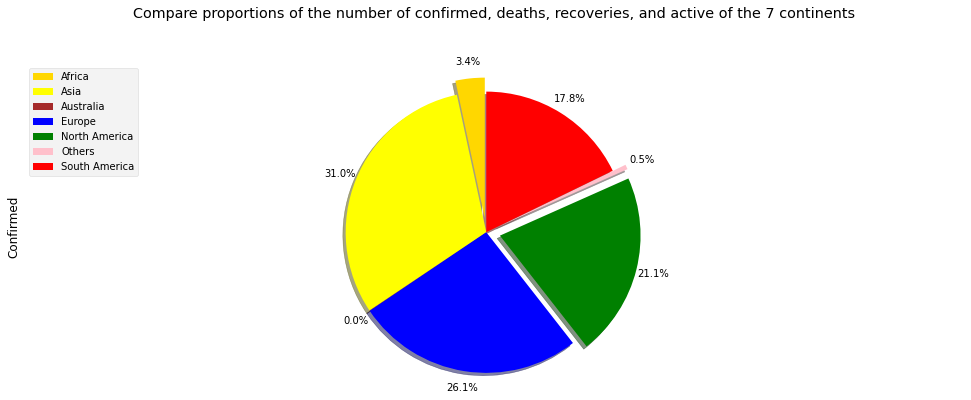

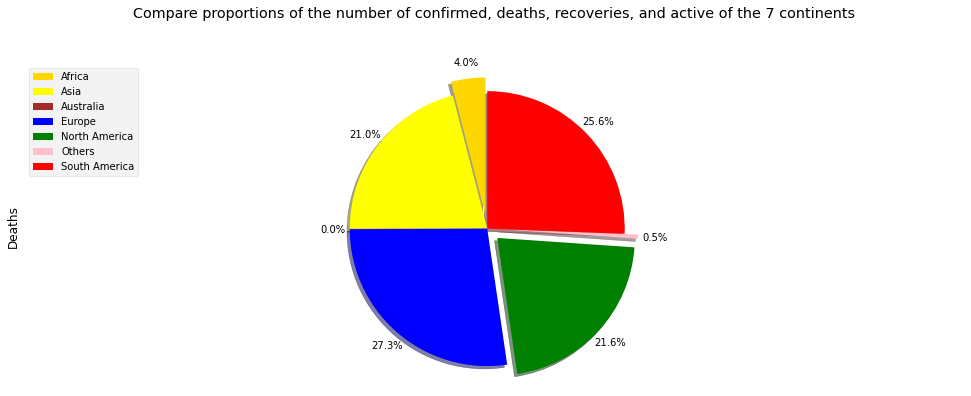

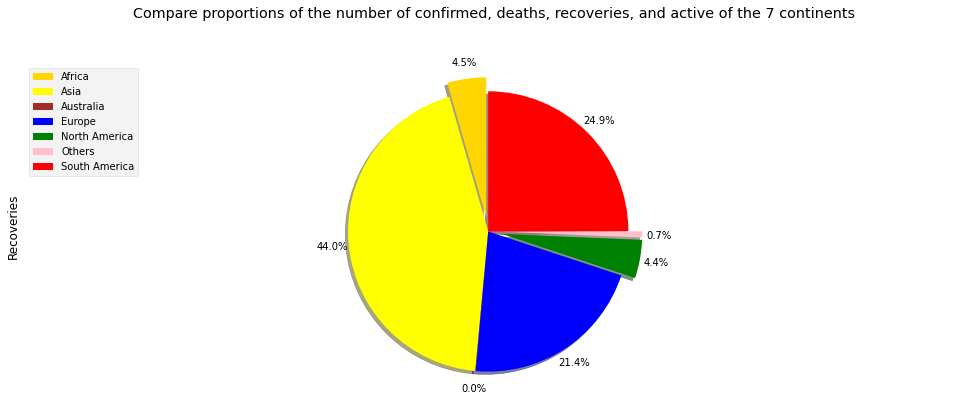

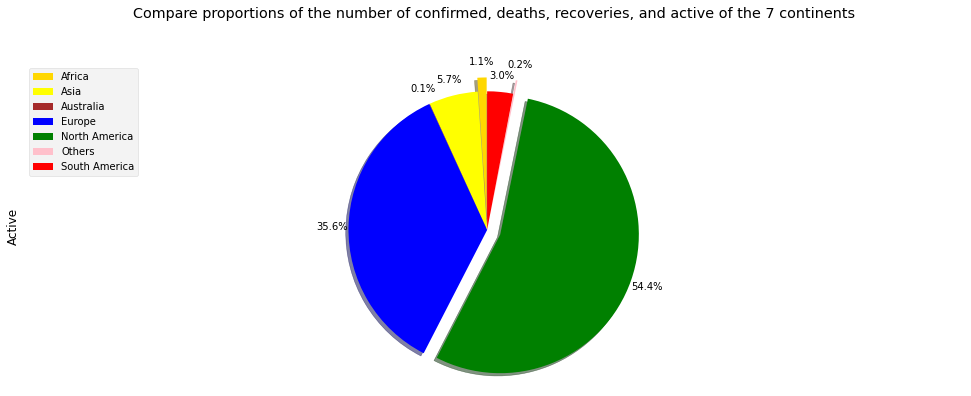

In [ ]:
colors_list = ['gold', 'yellow', 'brown', 'blue','green','pink','red']
columns = ['Confirmed','Deaths','Recoveries','Active']
explode_list = [0.1,0,0,0,0.1,0.1,0] # ratio for each continent with which to offset each wedge.
for column in columns:
    # Set up subplot
    f = plt.figure(figsize=(12,15)) # Create figure
    ax = f.add_subplot(111) # add Sub plot
    # Ploting the pie chart
    continents_df[column].plot(kind='pie', figsize=(15,6), colors=colors_list, autopct='%1.1f%%',
                               startangle=90, shadow=True, labels=None, pctdistance=1.12,
                               ax=ax, explode=explode_list)
    # scale the title up by 12% to match pctdistance
    plt.title('Compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents', y=1.12)
    plt.axis('equal')
    # add legend
    plt.legend(labels=continents_df.index, loc='upper left')
plt.show()



In [ ]:
label = ['Asia', 'Oceania', 'Europe', 'na', 'North America','Africa','South America']
data_confirmed = continents_df['Confirmed']
data_deaths = continents_df['Deaths']
data_recoveries = continents_df['Recoveries']
data_active = continents_df['Active']

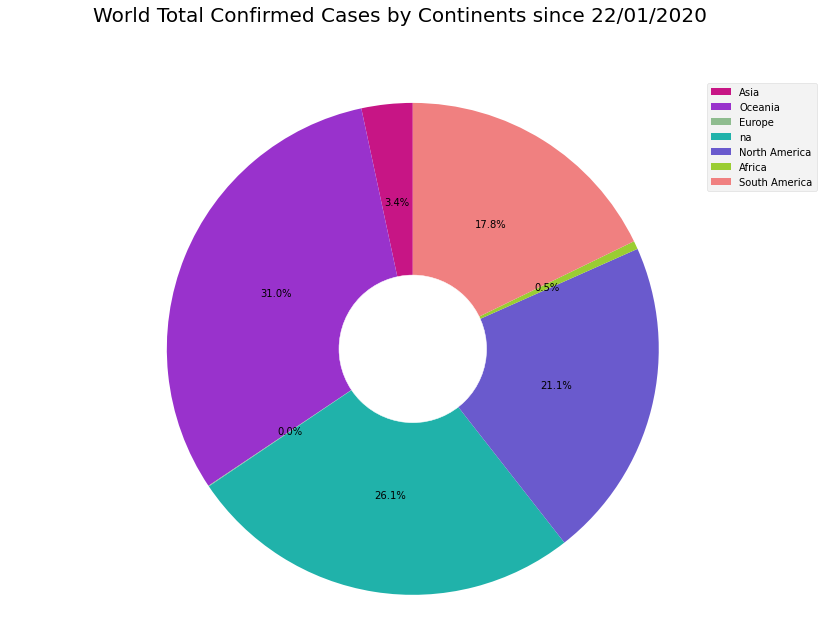

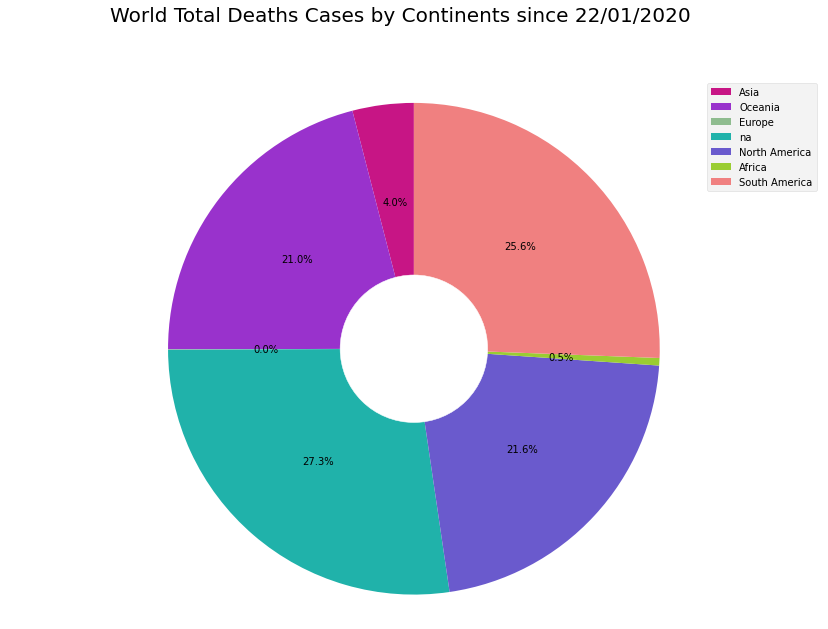

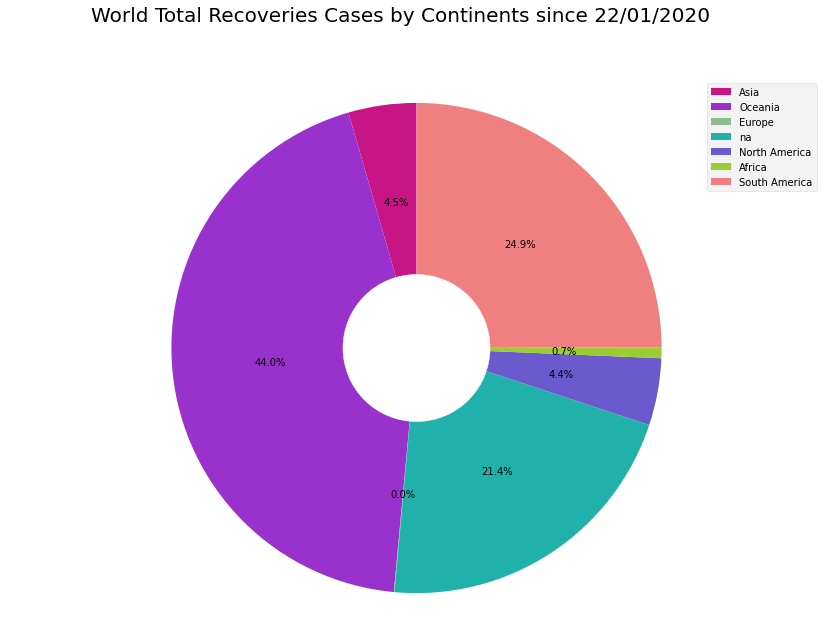

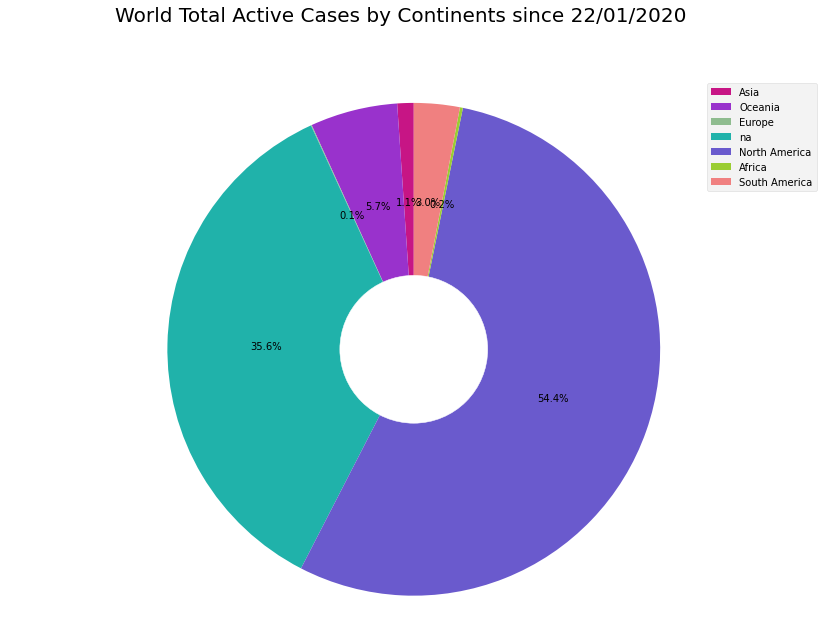

In [ ]:
# Confirmed
plt.figure(figsize=(13,10))
my_circle = plt.Circle((0,0),0.3, color = 'white')
plt.pie(data_confirmed, autopct='%1.1f%%', startangle=90, colors = ['mediumvioletred','darkorchid','darkseagreen','lightseagreen','slateblue','yellowgreen','lightcoral'])
plt.axis('equal')
plt.gca().add_artist(my_circle)
plt.suptitle('World Total Confirmed Cases by Continents since 22/01/2020', fontsize=20)
plt.legend(label)
plt.show()

# Deaths
plt.figure(figsize=(13,10))
my_circle = plt.Circle((0,0),0.3, color = 'white')
plt.pie(data_deaths, autopct='%1.1f%%', startangle=90, colors = ['mediumvioletred','darkorchid','darkseagreen','lightseagreen','slateblue','yellowgreen','lightcoral'])
plt.axis('equal')
plt.gca().add_artist(my_circle)
plt.suptitle('World Total Deaths Cases by Continents since 22/01/2020', fontsize=20)
plt.legend(label)
plt.show()

# Recoveries
plt.figure(figsize=(13,10))
my_circle = plt.Circle((0,0),0.3, color = 'white')
plt.pie(data_recoveries, autopct='%1.1f%%', startangle=90, colors = ['mediumvioletred','darkorchid','darkseagreen','lightseagreen','slateblue','yellowgreen','lightcoral'])
plt.axis('equal')
plt.gca().add_artist(my_circle)
plt.suptitle('World Total Recoveries Cases by Continents since 22/01/2020', fontsize=20)
plt.legend(label)
plt.show()

# Active
plt.figure(figsize=(13,10))
my_circle = plt.Circle((0,0),0.3, color = 'white')
plt.pie(data_active, autopct='%1.1f%%', startangle=90, colors = ['mediumvioletred','darkorchid','darkseagreen','lightseagreen','slateblue','yellowgreen','lightcoral'])
plt.axis('equal')
plt.gca().add_artist(my_circle)
plt.suptitle('World Total Active Cases by Continents since 22/01/2020', fontsize=20)
plt.legend(label)
plt.show()

# 6. Country analysis
# Problem 14

    Build a folim map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the circle is proportional to the number of confirmed.

In [ ]:
#Insert your code here:
word_map = folium.Map(location=[20,0], tiles="CartoDB Positron", zoom_start=2)


# add Circle one by one on the map
for i in range(len(countries_df)):
    #  get information for each Country 
    country_name = countries_df.index[i]
    latitude = countries_df.iloc[i]['Lat']
    longtitude = countries_df.iloc[i]['Long']
    confirmed = countries_df.iloc[i]['Confirmed']
    deaths = countries_df.iloc[i]['Deaths']
    recoveries = countries_df.iloc[i]['Recoveries']
    Mortality_rate = countries_df.iloc[i]['Mortality_rate']
    
    # Create html text
    html=f"""
            <div>
                <h5 style="text-align: center;"><b>{country_name}</b></h5>
                <hr style="margin: 0 0 10px 0">
                <li style="list-style:circle;">Confirmed: {confirmed}</li>
                <li style="list-style:circle;">Deaths: {deaths}</li>
                <li style="list-style:circle;">Recovered: {recoveries}</li>
                <li style="list-style:circle;">Mortality_rate Rate: {Mortality_rate}</li>
            </div>
          """
    
    # add Circle to the map
    folium.Circle(
        location=[latitude, longtitude],
        tooltip=html,
        radius=float(confirmed)/100,
        color='#FC7F03',
        fill=True,
       # fill_color='#FC7F03',
       # color="crimson",
        fill_color="#3186cc",
        popup="Covid 19 is so dangerous",
    ).add_to(word_map)
    
    
# Show the word map
word_map


In [ ]:
countries_active_cases = countries_df[['Lat','Long','Active']].copy()
countries_active_cases.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'West Bank and Gaza', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=194)

# Problem 15
    Build a px (plotly.express) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

In [ ]:
import plotly.express as px

countries_active_cases = countries_df[['Lat','Long','Active']].copy()

# Remove all 0 value in Active column
countries_active_cases['Active'].replace(0, np.NaN, inplace=True)
countries_active_cases.dropna(inplace=True)

# exchange active to int to call log10 function
countries_active_cases['Active'].astype('int64')

# Calculate log10 of Countries's Active Case
countries_active_cases['Log10 Active'] = np.log10(countries_active_cases['Active'])

# Ploting log10 Active case by countries
fig = px.scatter_geo(countries_active_cases, lat='Lat',lon='Long',color=countries_active_cases.index,
                     hover_name=countries_active_cases.index, size='Log10 Active')

fig.update_layout(title="Log10 Active Cases by Countries",
                  legend_title_text='Country')
fig.show()

C:\Users\Quan Thi Thanh Hoa\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

invalid value encountered in log10



ValueError: 
    Invalid element(s) received for the 'size' property of scattergeo.marker
        Invalid elements include: [nan]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above

# Problem 16
    Filter the top 10 countries based on the number of confirmed cases.

In [ ]:
top10 = countries_df['Confirmed'].nlargest(n=10)
top10

Country/Region
USA               35464069
India             31812114
Brazil            20034407
Russia             6274006
France             6272466
United Kingdom     5980830
Turkey             5822487
Argentina          4975616
Colombia           4815063
Spain              4545184
Name: Confirmed, dtype: int64

In [ ]:
top10_confirmed_countries = countries_df.sort_values(by="Confirmed", ascending=False).head(10)
top10_confirmed_countries

,Lat,Long,Continent,Confirmed,Deaths,Recoveries,Active,motality_rate
Country/Region,,,,,,,,
USA,40.000000,-100.000000,North America,35464069,611292,0,34852777,1.72
India,20.593684,78.962880,Asia,31812114,426290,30974748,411076,1.34
Brazil,-14.235000,-51.925300,South America,20034407,559944,17771228,1703235,2.79
Russia,61.524010,105.318756,Europe,6274006,159032,5609682,505292,2.53
France,3.933900,-53.125800,Europe,6272466,112245,415111,5745110,1.79
United Kingdom,18.220600,-63.068600,Europe,5980830,157161,24693,5798976,2.63
Turkey,38.963700,35.243300,Asia,5822487,51767,5478185,292535,0.89
Argentina,-38.416100,-63.616700,South America,4975616,106747,4615834,253035,2.15
Colombia,4.570900,-74.297300,South America,4815063,121695,4615354,78014,2.53


# Problem 17
    Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart.

In [ ]:
x = top10_confirmed_countries.index
# Create figure
fig = go.Figure()

# Create trace for each categories
trace0 = go.Bar(x=x, y=top10_confirmed_countries['Deaths'], name='Deaths')
trace1 = go.Bar(x=x, y=top10_confirmed_countries['Recoveries'], name='Recoveries')
trace2 = go.Bar(x=x, y=top10_confirmed_countries['Active'], name='Active')

# Adding trace to figure
fig.add_trace(trace0)
fig.add_trace(trace1)
fig.add_trace(trace2)

# Setting layout
fig.update_layout(barmode='stack',
                  title="Top 10 Countries (Confirmed Cases)",
                  xaxis_title="Country/Region",
                  yaxis_title="Sum of Value")
fig.update_xaxes(tickangle=45)

# Show plot
fig.show()

# 7. Advanced Analysis

# Problem 18 
* Nhìn vào biểu đồ line chart ở câu 2, thì các line active, deaths, recoveries, confirmed đều ở xu hướng tăng. 
* Cho nên với data hiện tại từ 20/1/2020 thì vẫn chưa qua được đỉnh của dịch. 

# Problem 19

In [ ]:
continents_df.head()

,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Continent,,,,,
Africa,6740943,172443,5863025,705475,2.56
Asia,62315282,899851,57659667,3755764,1.44
Australia,90000,1425,55290,33285,1.58
Europe,52448545,1167092,27947075,23334378,2.23
North America,42355130,924576,5776939,35653615,2.18


In [ ]:
continents_df['Death Rate %'] = (continents_df['Deaths']/continents_df['Deaths'].sum())*100
continents_df.sort_values('Death Rate %', ascending = False).head()
# Châu Âu có tỷ lệ tử vong cao nhất ~27%

,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Death Rate %
Continent,,,,,,
Europe,52448545,1167092,27947075,23334378,2.23,27.250518
South America,35722194,1096367,32656668,1969159,3.07,25.599155
North America,42355130,924576,5776939,35653615,2.18,21.587994
Asia,62315282,899851,57659667,3755764,1.44,21.010688
Africa,6740943,172443,5863025,705475,2.56,4.026384


In [ ]:
continents_df['Active Rate'] = (continents_df['Active']/continents_df['Active'].sum())*100
continents_df.sort_values('Active Rate',ascending = False).head()
# Châu Âu có tỷ lệ nhiễm cao nhất ~ 36%

,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Death Rate %,Active Rate
Continent,,,,,,,
North America,42355130,924576,5776939,35653615,2.18,21.587994,54.366707
Europe,52448545,1167092,27947075,23334378,2.23,27.250518,35.581617
Asia,62315282,899851,57659667,3755764,1.44,21.010688,5.727007
South America,35722194,1096367,32656668,1969159,3.07,25.599155,3.002688
Africa,6740943,172443,5863025,705475,2.56,4.026384,1.075749


In [ ]:
continents_df['Recoveries'] = (continents_df['Recoveries']/continents_df['Recoveries'].sum())*100
continents_df.sort_values('Active Rate',ascending = False).head()
# Cần kiểm tra lại về số liệu phục hồi

,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Death Rate %,Active Rate
Continent,,,,,,,
North America,42355130,924576,4.413278,35653615,2.18,21.587994,54.366707
Europe,52448545,1167092,21.350096,23334378,2.23,27.250518,35.581617
Asia,62315282,899851,44.048954,3755764,1.44,21.010688,5.727007
South America,35722194,1096367,24.947977,1969159,3.07,25.599155,3.002688
Africa,6740943,172443,4.479043,705475,2.56,4.026384,1.075749


# Problem 20
Based on the data visualization on the country part:<br>

    20.1 Which country has the highest death rate over countries' dataset?<br>
    20.2 Which country has the highest rate on Covid 2019 spread rate over countries' dataset?<br>
    20.3 Which country has the highest recoveries rate over countries' dataset?

In [ ]:
# the death rate of each country
countries_df['Death Rate %'] = (countries_df['Deaths']/countries_df['Deaths'].sum())*100
# the spread rate of each country
countries_df['Active Rate %'] = (countries_df['Active']/countries_df['Active'].sum())*100
# the recoveries rate of each country
countries_df['Recoveries Rate %'] = (countries_df['Recoveries']/countries_df['Recoveries'].sum())*100

In [ ]:
# 20.1
countries_df.sort_values('Death Rate %', ascending=False).head(1)

,Lat,Long,Continent,Confirmed,Deaths,Recoveries,Active,motality_rate,Death Rate %,Active Rate %,Recoveries Rate %
Country/Region,,,,,,,,,,,
USA,40.0,-100.0,North America,35464069,611292,0,34852777,1.72,15.010402,53.011756,0.0


In [ ]:
countries_df.sort_values('Active Rate %', ascending=False).head(1)

,Lat,Long,Continent,Confirmed,Deaths,Recoveries,Active,motality_rate,Death Rate %,Active Rate %,Recoveries Rate %
Country/Region,,,,,,,,,,,
USA,40.0,-100.0,North America,35464069,611292,0,34852777,1.72,15.010402,53.011756,0.0


In [ ]:
countries_df.sort_values('Recoveries Rate %', ascending=False).head(1)

,Lat,Long,Continent,Confirmed,Deaths,Recoveries,Active,motality_rate,Death Rate %,Active Rate %,Recoveries Rate %
Country/Region,,,,,,,,,,,
India,20.593684,78.96288,Asia,31812114,426290,30974748,411076,1.34,10.467639,0.625255,24.171402


# Problem 21
USA dataset

In [ ]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')
us_medical_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
0,Alabama,US,2020-07-07 04:34:13,32.3182,-86.9023,44932,1007,22082.0,21843.0,1,...,NaN,2914.0,NaN,84000001.0,USA,13536.486998,6.493159,2020-07-06,663719.0,2.241164
1,Alaska,US,2020-07-07 04:34:13,61.3707,-152.4044,1184,16,548.0,620.0,2,...,NaN,NaN,NaN,84000002.0,USA,16916.662680,NaN,2020-07-06,123753.0,1.351351
2,American Samoa,US,2020-07-07 04:34:13,-14.2710,-170.1320,0,0,NaN,NaN,60,...,NaN,NaN,NaN,16.0,ASM,1250.876152,NaN,2020-07-06,696.0,NaN
3,Arizona,US,2020-07-07 04:34:13,33.7298,-111.4312,101455,1829,11836.0,87790.0,4,...,NaN,5188.0,NaN,84000004.0,USA,8488.322873,5.113597,2020-07-06,873294.0,1.802770
4,Arkansas,US,2020-07-07 04:34:13,34.9697,-92.3731,24253,292,17834.0,6127.0,5,...,NaN,1575.0,NaN,84000005.0,USA,11431.093603,6.494042,2020-07-06,344968.0,1.203975


In [ ]:
# 21.1 which state has the highest death rate over states' dataset?
us_medical_data.sort_values(by='Mortality_Rate', ascending=False).dropna().head(1)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate


In [ ]:
us_medical_data['Death Rate %'] = (us_medical_data['Deaths']/us_medical_data['Deaths'].sum())*100
us_medical_data.sort_values('Death Rate %', ascending = False).head(1)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate,Death Rate %
36,New York,US,2020-07-07 04:34:13,42.1657,-74.9481,397649,32057,71040.0,294552.0,36,...,89995.0,NaN,84000036.0,USA,22042.910293,22.631768,2020-07-06,4288131.0,8.061632,24.641981


In [ ]:
# 21.2 Which state has the highest rate on Covid 2019 spread rate over states' dataset
us_medical_data['Active Rate %'] = (us_medical_data['Active']/us_medical_data['Active'].sum())*100
us_medical_data.sort_values('Active Rate %', ascending = False).head(1)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate,Death Rate %,Active Rate %
36,New York,US,2020-07-07 04:34:13,42.1657,-74.9481,397649,32057,71040.0,294552.0,36,...,NaN,84000036.0,USA,22042.910293,22.631768,2020-07-06,4288131.0,8.061632,24.641981,26.496591


In [ ]:
# 21.3 Which state has the highest recoveries rate over states' dataset
# 21.2 Which state has the highest rate on Covid 2019 spread rate over states' dataset
us_medical_data['Recoveries Rate %'] = (us_medical_data['Recovered']/us_medical_data['Recovered'].sum())*100
us_medical_data.sort_values('Recoveries Rate %', ascending = False).head(1)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate,Death Rate %,Active Rate %,Recoveries Rate %
49,Texas,US,2020-07-07 04:34:13,31.0545,-97.5635,204949,2872,103782.0,97880.0,48,...,84000048.0,USA,7462.194372,NaN,2020-07-06,2163729.0,1.404168,2.207685,8.80485,11.230019


# Problem 12

Build a regression model (or more than model) to predict the number of new confirmed in the top 10 states which have the highest number of confirmed cases in the USA.

Coefficient of determination: 0.809032489653313
Intercep: 52660.2943841314
Slope: [0.05905212]
Regression Equation: y = 0.05905212058218118x + 52660.2943841314


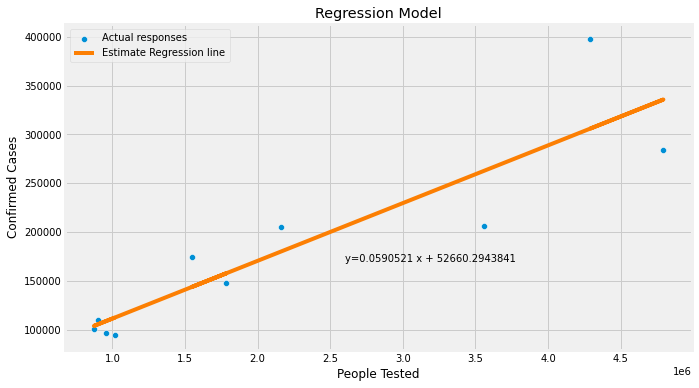

In [ ]:
from sklearn.linear_model import LinearRegression

# Top 10 state have highest confirmed
top10_state = us_medical_data.sort_values(by=['Confirmed'], ascending=False).head(10)
# top10_state

# input data
x = np.asarray(top10_state['People_Tested']).reshape((-1,1))
y = np.asarray(top10_state['Confirmed'])

# Create a linear regression model
model = LinearRegression(fit_intercept=True)
model.fit(x,y)

# Predict value
xfit = x
yfit = model.predict(xfit)

# Coefficient of determination
r_sq = model.score(x,y)
print('Coefficient of determination:', r_sq)

# Intercept
print('Intercep:', model.intercept_)

# Slope:
print('Slope:', model.coef_)

# Equation
print(f'Regression Equation: y = {model.coef_[0]}x + {model.intercept_}')

# Plot the estimated linear regression line:
fig = plt.figure(figsize=(10,6))

sns.scatterplot(data=top10_state, x = 'People_Tested', y='Confirmed', label='Actual responses')
plt.plot(xfit, yfit, color='#FC7F03', label = "Estimate Regression line")

# Regression Equation
plt.annotate('y={0:.7f} x + {1:.7f}'.format(model.coef_[0], model.intercept_), xy=(2600000,170000))

# Add label
plt.xlabel('People Tested')
plt.ylabel('Confirmed Cases')
plt.title('Regression Model')
plt.legend()

# Show plot
plt.show()